In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
import urllib.request
import os, sys, requests, csv, wget
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display
from IPython.display import Audio

In [2]:
#!pip install wget

In [3]:
url = "https://tspace.library.utoronto.ca/handle/1807/24487"
response = requests.get(url)
response.status_code

200

In [4]:
def make_soup(url):
    response = requests.get(url)
    code = response.status_code
    assert ((code >= 200) & (code < 300))
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    return soup

In [5]:
soup = make_soup(url)

strongs = soup.find_all('strong')[1:]

hrefs = [x.find('a', href = True)['href'] for x in strongs]

In [6]:
strongs

[<strong><a href="/handle/1807/24501">Toronto emotional speech set (TESS) - Older talker_Happy</a></strong>,
 <strong><a href="/handle/1807/24500">Toronto emotional speech set (TESS) - Younger talker_Sad</a></strong>,
 <strong><a href="/handle/1807/24499">Toronto emotional speech set (TESS) - Older talker_Angry</a></strong>,
 <strong><a href="/handle/1807/24498">Toronto emotional speech set (TESS) - Younger talker_Disgust</a></strong>,
 <strong><a href="/handle/1807/24497">Toronto emotional speech set (TESS) - Older talker_Sad</a></strong>,
 <strong><a href="/handle/1807/24496">Toronto emotional speech set (TESS) - Younger talker_Neutral</a></strong>,
 <strong><a href="/handle/1807/24495">Toronto emotional speech set (TESS) - Younger talker_Pleasant Surprise</a></strong>,
 <strong><a href="/handle/1807/24494">Toronto emotional speech set (TESS) - Older talker_Disgust</a></strong>,
 <strong><a href="/handle/1807/24493">Toronto emotional speech set (TESS) - Younger talker_Happy</a></stro

In [7]:
hrefs

['/handle/1807/24501',
 '/handle/1807/24500',
 '/handle/1807/24499',
 '/handle/1807/24498',
 '/handle/1807/24497',
 '/handle/1807/24496',
 '/handle/1807/24495',
 '/handle/1807/24494',
 '/handle/1807/24493',
 '/handle/1807/24492',
 '/handle/1807/24491',
 '/handle/1807/24490',
 '/handle/1807/24489',
 '/handle/1807/24488']

In [8]:
link_list = []

for href in hrefs:
    url = "https://tspace.library.utoronto.ca" + href
    soup = make_soup(url)
    div = soup.find('div', {'class': 'item-files'})
    a_tags = div.find_all('a')
    links = [x['href'] for x in a_tags]
    link_list += links

In [9]:
url_list = ['https://tspace.library.utoronto.ca' + x for x in link_list]

In [10]:
with open('url_list.txt', 'w') as file:
    for url in url_list:
        file.write(url + '\n')
    file.close()

In [11]:
!wget --input-file=url_list.txt --directory-prefix=TESS/

--2022-11-05 15:26:04--  https://tspace.library.utoronto.ca/bitstream/1807/24501/1/OAF_youth_happy.wav
Resolving tspace.library.utoronto.ca (tspace.library.utoronto.ca)... 142.1.120.113, 142.1.120.112, 142.1.120.111
Connecting to tspace.library.utoronto.ca (tspace.library.utoronto.ca)|142.1.120.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100888 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_youth_happy.wav'

OAF_youth_happy.wav 100%[===================>]  98.52K   375KB/s    in 0.3s    

2022-11-05 15:26:05 (375 KB/s) - 'TESS/OAF_youth_happy.wav' saved [100888/100888]

--2022-11-05 15:26:05--  https://tspace.library.utoronto.ca/bitstream/1807/24501/2/OAF_young_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96582 (94K) [audio/x-wav]
Saving to: 'TESS/OAF_young_happy.wav'

OAF_young_happy.wav 100%[===================>]  94.32K   552KB/s    in 0.2s    

2022-11-05 15:26:05 (552 KB/s

HTTP request sent, awaiting response... 200 OK
Length: 103672 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_voice_happy.wav'

OAF_voice_happy.wav 100%[===================>] 101.24K  --.-KB/s    in 0.04s   

2022-11-05 15:26:10 (2.49 MB/s) - 'TESS/OAF_voice_happy.wav' saved [103672/103672]

--2022-11-05 15:26:10--  https://tspace.library.utoronto.ca/bitstream/1807/24501/20/OAF_vine_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 90892 (89K) [audio/x-wav]
Saving to: 'TESS/OAF_vine_happy.wav'

OAF_vine_happy.wav  100%[===================>]  88.76K  --.-KB/s    in 0.006s  

2022-11-05 15:26:10 (15.5 MB/s) - 'TESS/OAF_vine_happy.wav' saved [90892/90892]

--2022-11-05 15:26:10--  https://tspace.library.utoronto.ca/bitstream/1807/24501/21/OAF_turn_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98198 (96K) [audio/x-wav]
Saving to: 'TESS/OA

HTTP request sent, awaiting response... 200 OK
Length: 98694 (96K) [audio/x-wav]
Saving to: 'TESS/OAF_such_happy.wav'

OAF_such_happy.wav  100%[===================>]  96.38K  --.-KB/s    in 0.05s   

2022-11-05 15:26:14 (2.02 MB/s) - 'TESS/OAF_such_happy.wav' saved [98694/98694]

--2022-11-05 15:26:14--  https://tspace.library.utoronto.ca/bitstream/1807/24501/39/OAF_sub_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94638 (92K) [audio/x-wav]
Saving to: 'TESS/OAF_sub_happy.wav'

OAF_sub_happy.wav   100%[===================>]  92.42K  --.-KB/s    in 0.007s  

2022-11-05 15:26:14 (12.3 MB/s) - 'TESS/OAF_sub_happy.wav' saved [94638/94638]

--2022-11-05 15:26:14--  https://tspace.library.utoronto.ca/bitstream/1807/24501/40/OAF_south_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100448 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_south

OAF_said_happy.wav  100%[===================>]  94.37K  --.-KB/s    in 0.05s   

2022-11-05 15:26:18 (1.80 MB/s) - 'TESS/OAF_said_happy.wav' saved [96634/96634]

--2022-11-05 15:26:18--  https://tspace.library.utoronto.ca/bitstream/1807/24501/57/OAF_rush_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102028 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_rush_happy.wav'

OAF_rush_happy.wav  100%[===================>]  99.64K  --.-KB/s    in 0.06s   

2022-11-05 15:26:19 (1.64 MB/s) - 'TESS/OAF_rush_happy.wav' saved [102028/102028]

--2022-11-05 15:26:19--  https://tspace.library.utoronto.ca/bitstream/1807/24501/58/OAF_rough_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102648 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_rough_happy.wav'

OAF_rough_happy.wav 100%[===================>] 100.24K  --.-KB/s    in 0.04s   

2022-11-05 15:26:

HTTP request sent, awaiting response... 200 OK
Length: 96940 (95K) [audio/x-wav]
Saving to: 'TESS/OAF_pole_happy.wav'

OAF_pole_happy.wav  100%[===================>]  94.67K  --.-KB/s    in 0.1s    

2022-11-05 15:26:24 (928 KB/s) - 'TESS/OAF_pole_happy.wav' saved [96940/96940]

--2022-11-05 15:26:24--  https://tspace.library.utoronto.ca/bitstream/1807/24501/76/OAF_pike_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100280 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_pike_happy.wav'

OAF_pike_happy.wav  100%[===================>]  97.93K   329KB/s    in 0.3s    

2022-11-05 15:26:25 (329 KB/s) - 'TESS/OAF_pike_happy.wav' saved [100280/100280]

--2022-11-05 15:26:25--  https://tspace.library.utoronto.ca/bitstream/1807/24501/77/OAF_pick_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101908 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_p

2022-11-05 15:26:30 (2.37 MB/s) - 'TESS/OAF_mouse_happy.wav' saved [106192/106192]

--2022-11-05 15:26:30--  https://tspace.library.utoronto.ca/bitstream/1807/24501/94/OAF_mop_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106566 (104K) [audio/x-wav]
Saving to: 'TESS/OAF_mop_happy.wav'

OAF_mop_happy.wav   100%[===================>] 104.07K  --.-KB/s    in 0.04s   

2022-11-05 15:26:30 (2.35 MB/s) - 'TESS/OAF_mop_happy.wav' saved [106566/106566]

--2022-11-05 15:26:30--  https://tspace.library.utoronto.ca/bitstream/1807/24501/95/OAF_moon_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 90744 (89K) [audio/x-wav]
Saving to: 'TESS/OAF_moon_happy.wav'

OAF_moon_happy.wav  100%[===================>]  88.62K  --.-KB/s    in 0.04s   

2022-11-05 15:26:30 (2.10 MB/s) - 'TESS/OAF_moon_happy.wav' saved [90744/90744]

--2022-11-05 15:26:30

HTTP request sent, awaiting response... 200 OK
Length: 99246 (97K) [audio/x-wav]
Saving to: 'TESS/OAF_live_happy.wav'

OAF_live_happy.wav  100%[===================>]  96.92K  --.-KB/s    in 0.05s   

2022-11-05 15:26:34 (1.90 MB/s) - 'TESS/OAF_live_happy.wav' saved [99246/99246]

--2022-11-05 15:26:34--  https://tspace.library.utoronto.ca/bitstream/1807/24501/113/OAF_limb_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 91070 (89K) [audio/x-wav]
Saving to: 'TESS/OAF_limb_happy.wav'

OAF_limb_happy.wav  100%[===================>]  88.94K  --.-KB/s    in 0.05s   

2022-11-05 15:26:34 (1.75 MB/s) - 'TESS/OAF_limb_happy.wav' saved [91070/91070]

--2022-11-05 15:26:34--  https://tspace.library.utoronto.ca/bitstream/1807/24501/114/OAF_life_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96666 (94K) [audio/x-wav]
Saving to: 'TESS/OAF_li

HTTP request sent, awaiting response... 200 OK
Length: 102984 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_judge_happy.wav'

OAF_judge_happy.wav 100%[===================>] 100.57K  --.-KB/s    in 0.07s   

2022-11-05 15:26:40 (1.51 MB/s) - 'TESS/OAF_judge_happy.wav' saved [102984/102984]

--2022-11-05 15:26:40--  https://tspace.library.utoronto.ca/bitstream/1807/24501/132/OAF_join_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99528 (97K) [audio/x-wav]
Saving to: 'TESS/OAF_join_happy.wav'

OAF_join_happy.wav  100%[===================>]  97.20K  --.-KB/s    in 0.04s   

2022-11-05 15:26:40 (2.29 MB/s) - 'TESS/OAF_join_happy.wav' saved [99528/99528]

--2022-11-05 15:26:40--  https://tspace.library.utoronto.ca/bitstream/1807/24501/133/OAF_jar_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94050 (92K) [audio/x-wav]
Saving to: 'TESS/O

HTTP request sent, awaiting response... 200 OK
Length: 96424 (94K) [audio/x-wav]
Saving to: 'TESS/OAF_goal_happy.wav'

OAF_goal_happy.wav  100%[===================>]  94.16K  --.-KB/s    in 0.005s  

2022-11-05 15:26:44 (17.6 MB/s) - 'TESS/OAF_goal_happy.wav' saved [96424/96424]

--2022-11-05 15:26:44--  https://tspace.library.utoronto.ca/bitstream/1807/24501/151/OAF_gin_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93966 (92K) [audio/x-wav]
Saving to: 'TESS/OAF_gin_happy.wav'

OAF_gin_happy.wav   100%[===================>]  91.76K  --.-KB/s    in 0.005s  

2022-11-05 15:26:44 (18.6 MB/s) - 'TESS/OAF_gin_happy.wav' saved [93966/93966]

--2022-11-05 15:26:44--  https://tspace.library.utoronto.ca/bitstream/1807/24501/152/OAF_get_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92092 (90K) [audio/x-wav]
Saving to: 'TESS/OAF_get_ha

HTTP request sent, awaiting response... 200 OK
Length: 99556 (97K) [audio/x-wav]
Saving to: 'TESS/OAF_calm_happy.wav'

OAF_calm_happy.wav  100%[===================>]  97.22K  --.-KB/s    in 0.005s  

2022-11-05 15:26:52 (17.5 MB/s) - 'TESS/OAF_calm_happy.wav' saved [99556/99556]

--2022-11-05 15:26:52--  https://tspace.library.utoronto.ca/bitstream/1807/24501/188/OAF_cab_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 97640 (95K) [audio/x-wav]
Saving to: 'TESS/OAF_cab_happy.wav'

OAF_cab_happy.wav   100%[===================>]  95.35K  --.-KB/s    in 0.02s   

2022-11-05 15:26:53 (5.35 MB/s) - 'TESS/OAF_cab_happy.wav' saved [97640/97640]

--2022-11-05 15:26:53--  https://tspace.library.utoronto.ca/bitstream/1807/24501/189/OAF_burn_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92752 (91K) [audio/x-wav]
Saving to: 'TESS/OAF_burn_

YAF_witch_sad.wav   100%[===================>] 105.85K  --.-KB/s    in 0.05s   

2022-11-05 15:26:59 (2.18 MB/s) - 'TESS/YAF_witch_sad.wav' saved [108392/108392]

--2022-11-05 15:26:59--  https://tspace.library.utoronto.ca/bitstream/1807/24500/6/YAF_wire_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 120136 (117K) [audio/x-wav]
Saving to: 'TESS/YAF_wire_sad.wav'

YAF_wire_sad.wav    100%[===================>] 117.32K  --.-KB/s    in 0.05s   

2022-11-05 15:27:00 (2.36 MB/s) - 'TESS/YAF_wire_sad.wav' saved [120136/120136]

--2022-11-05 15:27:00--  https://tspace.library.utoronto.ca/bitstream/1807/24500/7/YAF_wife_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112194 (110K) [audio/x-wav]
Saving to: 'TESS/YAF_wife_sad.wav'

YAF_wife_sad.wav    100%[===================>] 109.56K  --.-KB/s    in 0.05s   

2022-11-05 15:27:00 (2.28 MB/s

HTTP request sent, awaiting response... 200 OK
Length: 105964 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_ton_sad.wav'

YAF_ton_sad.wav     100%[===================>] 103.48K  --.-KB/s    in 0.007s  

2022-11-05 15:27:04 (15.1 MB/s) - 'TESS/YAF_ton_sad.wav' saved [105964/105964]

--2022-11-05 15:27:04--  https://tspace.library.utoronto.ca/bitstream/1807/24500/25/YAF_tire_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 104946 (102K) [audio/x-wav]
Saving to: 'TESS/YAF_tire_sad.wav'

YAF_tire_sad.wav    100%[===================>] 102.49K  --.-KB/s    in 0.002s  

2022-11-05 15:27:04 (64.7 MB/s) - 'TESS/YAF_tire_sad.wav' saved [104946/104946]

--2022-11-05 15:27:04--  https://tspace.library.utoronto.ca/bitstream/1807/24500/26/YAF_tip_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105082 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_tip_sad.w

HTTP request sent, awaiting response... 200 OK
Length: 114588 (112K) [audio/x-wav]
Saving to: 'TESS/YAF_room_sad.wav'

YAF_room_sad.wav    100%[===================>] 111.90K  --.-KB/s    in 0.02s   

2022-11-05 15:27:12 (6.63 MB/s) - 'TESS/YAF_room_sad.wav' saved [114588/114588]

--2022-11-05 15:27:12--  https://tspace.library.utoronto.ca/bitstream/1807/24500/62/YAF_road_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115118 (112K) [audio/x-wav]
Saving to: 'TESS/YAF_road_sad.wav'

YAF_road_sad.wav    100%[===================>] 112.42K  --.-KB/s    in 0.006s  

2022-11-05 15:27:12 (18.5 MB/s) - 'TESS/YAF_road_sad.wav' saved [115118/115118]

--2022-11-05 15:27:12--  https://tspace.library.utoronto.ca/bitstream/1807/24500/63/YAF_ripe_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103764 (101K) [audio/x-wav]
Saving to: 'TESS/YAF_ripe_s

HTTP request sent, awaiting response... 200 OK
Length: 115336 (113K) [audio/x-wav]
Saving to: 'TESS/YAF_peg_sad.wav'

YAF_peg_sad.wav     100%[===================>] 112.63K  --.-KB/s    in 0.006s  

2022-11-05 15:27:16 (18.6 MB/s) - 'TESS/YAF_peg_sad.wav' saved [115336/115336]

--2022-11-05 15:27:16--  https://tspace.library.utoronto.ca/bitstream/1807/24500/81/YAF_pearl_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112580 (110K) [audio/x-wav]
Saving to: 'TESS/YAF_pearl_sad.wav'

YAF_pearl_sad.wav   100%[===================>] 109.94K  --.-KB/s    in 0.007s  

2022-11-05 15:27:16 (14.6 MB/s) - 'TESS/YAF_pearl_sad.wav' saved [112580/112580]

--2022-11-05 15:27:16--  https://tspace.library.utoronto.ca/bitstream/1807/24500/82/YAF_pass_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 122360 (119K) [audio/x-wav]
Saving to: 'TESS/YAF_pass_

HTTP request sent, awaiting response... 200 OK
Length: 105842 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_mill_sad.wav'

YAF_mill_sad.wav    100%[===================>] 103.36K  --.-KB/s    in 0.003s  

2022-11-05 15:27:20 (31.5 MB/s) - 'TESS/YAF_mill_sad.wav' saved [105842/105842]

--2022-11-05 15:27:20--  https://tspace.library.utoronto.ca/bitstream/1807/24500/100/YAF_met_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 107194 (105K) [audio/x-wav]
Saving to: 'TESS/YAF_met_sad.wav'

YAF_met_sad.wav     100%[===================>] 104.68K  --.-KB/s    in 0.03s   

2022-11-05 15:27:20 (2.97 MB/s) - 'TESS/YAF_met_sad.wav' saved [107194/107194]

--2022-11-05 15:27:20--  https://tspace.library.utoronto.ca/bitstream/1807/24500/101/YAF_mess_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 120584 (118K) [audio/x-wav]
Saving to: 'TESS/YAF_mess_sa

HTTP request sent, awaiting response... 200 OK
Length: 112838 (110K) [audio/x-wav]
Saving to: 'TESS/YAF_lean_sad.wav'

YAF_lean_sad.wav    100%[===================>] 110.19K  --.-KB/s    in 0.004s  

2022-11-05 15:27:24 (25.1 MB/s) - 'TESS/YAF_lean_sad.wav' saved [112838/112838]

--2022-11-05 15:27:24--  https://tspace.library.utoronto.ca/bitstream/1807/24500/119/YAF_laud_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 107108 (105K) [audio/x-wav]
Saving to: 'TESS/YAF_laud_sad.wav'

YAF_laud_sad.wav    100%[===================>] 104.60K  --.-KB/s    in 0.004s  

2022-11-05 15:27:24 (28.0 MB/s) - 'TESS/YAF_laud_sad.wav' saved [107108/107108]

--2022-11-05 15:27:24--  https://tspace.library.utoronto.ca/bitstream/1807/24500/120/YAF_late_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 110698 (108K) [audio/x-wav]
Saving to: 'TESS/YAF_late

HTTP request sent, awaiting response... 200 OK
Length: 102698 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_home_sad.wav'

YAF_home_sad.wav    100%[===================>] 100.29K  --.-KB/s    in 0.05s   

2022-11-05 15:27:29 (1.88 MB/s) - 'TESS/YAF_home_sad.wav' saved [102698/102698]

--2022-11-05 15:27:29--  https://tspace.library.utoronto.ca/bitstream/1807/24500/138/YAF_hole_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 110616 (108K) [audio/x-wav]
Saving to: 'TESS/YAF_hole_sad.wav'

YAF_hole_sad.wav    100%[===================>] 108.02K  --.-KB/s    in 0.007s  

2022-11-05 15:27:29 (15.6 MB/s) - 'TESS/YAF_hole_sad.wav' saved [110616/110616]

--2022-11-05 15:27:29--  https://tspace.library.utoronto.ca/bitstream/1807/24500/139/YAF_hit_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 116358 (114K) [audio/x-wav]
Saving to: 'TESS/YAF_hit_s

HTTP request sent, awaiting response... 200 OK
Length: 109096 (107K) [audio/x-wav]
Saving to: 'TESS/YAF_gap_sad.wav'

YAF_gap_sad.wav     100%[===================>] 106.54K  --.-KB/s    in 0.006s  

2022-11-05 15:27:33 (17.7 MB/s) - 'TESS/YAF_gap_sad.wav' saved [109096/109096]

--2022-11-05 15:27:33--  https://tspace.library.utoronto.ca/bitstream/1807/24500/157/YAF_food_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113044 (110K) [audio/x-wav]
Saving to: 'TESS/YAF_food_sad.wav'

YAF_food_sad.wav    100%[===================>] 110.39K  --.-KB/s    in 0.005s  

2022-11-05 15:27:33 (23.0 MB/s) - 'TESS/YAF_food_sad.wav' saved [113044/113044]

--2022-11-05 15:27:33--  https://tspace.library.utoronto.ca/bitstream/1807/24500/158/YAF_five_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118502 (116K) [audio/x-wav]
Saving to: 'TESS/YAF_five_s

HTTP request sent, awaiting response... 200 OK
Length: 108054 (106K) [audio/x-wav]
Saving to: 'TESS/YAF_dab_sad.wav'

YAF_dab_sad.wav     100%[===================>] 105.52K  --.-KB/s    in 0.02s   

2022-11-05 15:27:38 (4.46 MB/s) - 'TESS/YAF_dab_sad.wav' saved [108054/108054]

--2022-11-05 15:27:38--  https://tspace.library.utoronto.ca/bitstream/1807/24500/176/YAF_cool_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113994 (111K) [audio/x-wav]
Saving to: 'TESS/YAF_cool_sad.wav'

YAF_cool_sad.wav    100%[===================>] 111.32K  --.-KB/s    in 0.002s  

2022-11-05 15:27:38 (56.6 MB/s) - 'TESS/YAF_cool_sad.wav' saved [113994/113994]

--2022-11-05 15:27:38--  https://tspace.library.utoronto.ca/bitstream/1807/24500/177/YAF_choice_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 117004 (114K) [audio/x-wav]
Saving to: 'TESS/YAF_choi

HTTP request sent, awaiting response... 200 OK
Length: 99752 (97K) [audio/x-wav]
Saving to: 'TESS/YAF_bite_sad.wav'

YAF_bite_sad.wav    100%[===================>]  97.41K  --.-KB/s    in 0.004s  

2022-11-05 15:27:42 (22.6 MB/s) - 'TESS/YAF_bite_sad.wav' saved [99752/99752]

--2022-11-05 15:27:42--  https://tspace.library.utoronto.ca/bitstream/1807/24500/195/YAF_beg_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 104878 (102K) [audio/x-wav]
Saving to: 'TESS/YAF_beg_sad.wav'

YAF_beg_sad.wav     100%[===================>] 102.42K  --.-KB/s    in 0.005s  

2022-11-05 15:27:42 (19.9 MB/s) - 'TESS/YAF_beg_sad.wav' saved [104878/104878]

--2022-11-05 15:27:42--  https://tspace.library.utoronto.ca/bitstream/1807/24500/196/YAF_bean_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108548 (106K) [audio/x-wav]
Saving to: 'TESS/YAF_bean_sad.wa

HTTP request sent, awaiting response... 200 OK
Length: 76244 (74K) [audio/x-wav]
Saving to: 'TESS/OAF_week_angry.wav'

OAF_week_angry.wav  100%[===================>]  74.46K  --.-KB/s    in 0.009s  

2022-11-05 15:27:46 (7.97 MB/s) - 'TESS/OAF_week_angry.wav' saved [76244/76244]

--2022-11-05 15:27:46--  https://tspace.library.utoronto.ca/bitstream/1807/24499/14/OAF_wash_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 88062 (86K) [audio/x-wav]
Saving to: 'TESS/OAF_wash_angry.wav'

OAF_wash_angry.wav  100%[===================>]  86.00K  --.-KB/s    in 0.004s  

2022-11-05 15:27:46 (19.0 MB/s) - 'TESS/OAF_wash_angry.wav' saved [88062/88062]

--2022-11-05 15:27:46--  https://tspace.library.utoronto.ca/bitstream/1807/24499/15/OAF_walk_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 77478 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_walk

HTTP request sent, awaiting response... 200 OK
Length: 79692 (78K) [audio/x-wav]
Saving to: 'TESS/OAF_tell_angry.wav'

OAF_tell_angry.wav  100%[===================>]  77.82K  --.-KB/s    in 0.003s  

2022-11-05 15:27:50 (22.2 MB/s) - 'TESS/OAF_tell_angry.wav' saved [79692/79692]

--2022-11-05 15:27:50--  https://tspace.library.utoronto.ca/bitstream/1807/24499/33/OAF_team_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 78504 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_team_angry.wav'

OAF_team_angry.wav  100%[===================>]  76.66K  --.-KB/s    in 0.02s   

2022-11-05 15:27:51 (4.48 MB/s) - 'TESS/OAF_team_angry.wav' saved [78504/78504]

--2022-11-05 15:27:51--  https://tspace.library.utoronto.ca/bitstream/1807/24499/34/OAF_tape_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 82262 (80K) [audio/x-wav]
Saving to: 'TESS/OAF_tape

HTTP request sent, awaiting response... 200 OK
Length: 79704 (78K) [audio/x-wav]
Saving to: 'TESS/OAF_raise_angry.wav'

OAF_raise_angry.wav 100%[===================>]  77.84K  --.-KB/s    in 0.004s  

2022-11-05 15:27:58 (19.7 MB/s) - 'TESS/OAF_raise_angry.wav' saved [79704/79704]

--2022-11-05 15:27:58--  https://tspace.library.utoronto.ca/bitstream/1807/24499/70/OAF_rain_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 73560 (72K) [audio/x-wav]
Saving to: 'TESS/OAF_rain_angry.wav'

OAF_rain_angry.wav  100%[===================>]  71.84K  --.-KB/s    in 0.004s  

2022-11-05 15:27:58 (17.1 MB/s) - 'TESS/OAF_rain_angry.wav' saved [73560/73560]

--2022-11-05 15:27:58--  https://tspace.library.utoronto.ca/bitstream/1807/24499/71/OAF_raid_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 76618 (75K) [audio/x-wav]
Saving to: 'TESS/OAF_ra

HTTP request sent, awaiting response... 200 OK
Length: 79280 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_nice_angry.wav'

OAF_nice_angry.wav  100%[===================>]  77.42K  --.-KB/s    in 0.007s  

2022-11-05 15:28:03 (10.1 MB/s) - 'TESS/OAF_nice_angry.wav' saved [79280/79280]

--2022-11-05 15:28:03--  https://tspace.library.utoronto.ca/bitstream/1807/24499/89/OAF_neat_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 81960 (80K) [audio/x-wav]
Saving to: 'TESS/OAF_neat_angry.wav'

OAF_neat_angry.wav  100%[===================>]  80.04K  --.-KB/s    in 0.006s  

2022-11-05 15:28:03 (13.6 MB/s) - 'TESS/OAF_neat_angry.wav' saved [81960/81960]

--2022-11-05 15:28:03--  https://tspace.library.utoronto.ca/bitstream/1807/24499/90/OAF_near_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 74272 (73K) [audio/x-wav]
Saving to: 'TESS/OAF_near

HTTP request sent, awaiting response... 200 OK
Length: 78798 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_lot_angry.wav'

OAF_lot_angry.wav   100%[===================>]  76.95K  --.-KB/s    in 0.02s   

2022-11-05 15:28:07 (4.90 MB/s) - 'TESS/OAF_lot_angry.wav' saved [78798/78798]

--2022-11-05 15:28:07--  https://tspace.library.utoronto.ca/bitstream/1807/24499/108/OAF_lose_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 81866 (80K) [audio/x-wav]
Saving to: 'TESS/OAF_lose_angry.wav'

OAF_lose_angry.wav  100%[===================>]  79.95K  --.-KB/s    in 0.005s  

2022-11-05 15:28:07 (14.4 MB/s) - 'TESS/OAF_lose_angry.wav' saved [81866/81866]

--2022-11-05 15:28:07--  https://tspace.library.utoronto.ca/bitstream/1807/24499/109/OAF_lore_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 83180 (81K) [audio/x-wav]
Saving to: 'TESS/OAF_lore

HTTP request sent, awaiting response... 200 OK
Length: 70384 (69K) [audio/x-wav]
Saving to: 'TESS/OAF_keg_angry.wav'

OAF_keg_angry.wav   100%[===================>]  68.73K  --.-KB/s    in 0.006s  

2022-11-05 15:28:11 (11.5 MB/s) - 'TESS/OAF_keg_angry.wav' saved [70384/70384]

--2022-11-05 15:28:11--  https://tspace.library.utoronto.ca/bitstream/1807/24499/127/OAF_keep_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 76002 (74K) [audio/x-wav]
Saving to: 'TESS/OAF_keep_angry.wav'

OAF_keep_angry.wav  100%[===================>]  74.22K  --.-KB/s    in 0.002s  

2022-11-05 15:28:11 (46.7 MB/s) - 'TESS/OAF_keep_angry.wav' saved [76002/76002]

--2022-11-05 15:28:11--  https://tspace.library.utoronto.ca/bitstream/1807/24499/128/OAF_keen_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 83688 (82K) [audio/x-wav]
Saving to: 'TESS/OAF_keen

HTTP request sent, awaiting response... 200 OK
Length: 73442 (72K) [audio/x-wav]
Saving to: 'TESS/OAF_hall_angry.wav'

OAF_hall_angry.wav  100%[===================>]  71.72K  --.-KB/s    in 0.001s  

2022-11-05 15:28:15 (87.5 MB/s) - 'TESS/OAF_hall_angry.wav' saved [73442/73442]

--2022-11-05 15:28:15--  https://tspace.library.utoronto.ca/bitstream/1807/24499/146/OAF_half_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 82846 (81K) [audio/x-wav]
Saving to: 'TESS/OAF_half_angry.wav'

OAF_half_angry.wav  100%[===================>]  80.90K   450KB/s    in 0.2s    

2022-11-05 15:28:15 (450 KB/s) - 'TESS/OAF_half_angry.wav' saved [82846/82846]

--2022-11-05 15:28:15--  https://tspace.library.utoronto.ca/bitstream/1807/24499/147/OAF_gun_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 75302 (74K) [audio/x-wav]
Saving to: 'TESS/OAF_gun_

HTTP request sent, awaiting response... 200 OK
Length: 75236 (73K) [audio/x-wav]
Saving to: 'TESS/OAF_door_angry.wav'

OAF_door_angry.wav  100%[===================>]  73.47K  --.-KB/s    in 0.004s  

2022-11-05 15:28:19 (17.1 MB/s) - 'TESS/OAF_door_angry.wav' saved [75236/75236]

--2022-11-05 15:28:19--  https://tspace.library.utoronto.ca/bitstream/1807/24499/165/OAF_doll_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 79772 (78K) [audio/x-wav]
Saving to: 'TESS/OAF_doll_angry.wav'

OAF_doll_angry.wav  100%[===================>]  77.90K  --.-KB/s    in 0.007s  

2022-11-05 15:28:19 (10.6 MB/s) - 'TESS/OAF_doll_angry.wav' saved [79772/79772]

--2022-11-05 15:28:19--  https://tspace.library.utoronto.ca/bitstream/1807/24499/166/OAF_dog_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 82596 (81K) [audio/x-wav]
Saving to: 'TESS/OAF_dog

HTTP request sent, awaiting response... 200 OK
Length: 78840 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_chair_angry.wav'

OAF_chair_angry.wav 100%[===================>]  76.99K  --.-KB/s    in 0.003s  

2022-11-05 15:28:23 (26.0 MB/s) - 'TESS/OAF_chair_angry.wav' saved [78840/78840]

--2022-11-05 15:28:23--  https://tspace.library.utoronto.ca/bitstream/1807/24499/184/OAF_chain_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 78232 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_chain_angry.wav'

OAF_chain_angry.wav 100%[===================>]  76.40K  --.-KB/s    in 0.004s  

2022-11-05 15:28:23 (17.2 MB/s) - 'TESS/OAF_chain_angry.wav' saved [78232/78232]

--2022-11-05 15:28:23--  https://tspace.library.utoronto.ca/bitstream/1807/24499/185/OAF_cause_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 82860 (81K) [audio/x-wav]
Saving to: 'TESS/

YAF_youth_disgust.w 100%[===================>] 127.56K   551KB/s    in 0.2s    

2022-11-05 15:28:27 (551 KB/s) - 'TESS/YAF_youth_disgust.wav' saved [130620/130620]

--2022-11-05 15:28:27--  https://tspace.library.utoronto.ca/bitstream/1807/24498/2/YAF_young_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 127444 (124K) [audio/x-wav]
Saving to: 'TESS/YAF_young_disgust.wav'

YAF_young_disgust.w 100%[===================>] 124.46K  --.-KB/s    in 0.04s   

2022-11-05 15:28:27 (2.87 MB/s) - 'TESS/YAF_young_disgust.wav' saved [127444/127444]

--2022-11-05 15:28:27--  https://tspace.library.utoronto.ca/bitstream/1807/24498/3/YAF_yes_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 119608 (117K) [audio/x-wav]
Saving to: 'TESS/YAF_yes_disgust.wav'

YAF_yes_disgust.wav 100%[===================>] 116.80K  --.-KB/s    in 0.06s   

2022-1

HTTP request sent, awaiting response... 200 OK
Length: 120964 (118K) [audio/x-wav]
Saving to: 'TESS/YAF_vine_disgust.wav'

YAF_vine_disgust.wa 100%[===================>] 118.13K  --.-KB/s    in 0.01s   

2022-11-05 15:28:31 (9.04 MB/s) - 'TESS/YAF_vine_disgust.wav' saved [120964/120964]

--2022-11-05 15:28:31--  https://tspace.library.utoronto.ca/bitstream/1807/24498/21/YAF_turn_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 126346 (123K) [audio/x-wav]
Saving to: 'TESS/YAF_turn_disgust.wav'

YAF_turn_disgust.wa 100%[===================>] 123.38K  --.-KB/s    in 0.005s  

2022-11-05 15:28:32 (24.6 MB/s) - 'TESS/YAF_turn_disgust.wav' saved [126346/126346]

--2022-11-05 15:28:32--  https://tspace.library.utoronto.ca/bitstream/1807/24498/22/YAF_tough_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 123234 (120K) [audio/x-wav]
Sa

HTTP request sent, awaiting response... 200 OK
Length: 129974 (127K) [audio/x-wav]
Saving to: 'TESS/YAF_such_disgust.wav'

YAF_such_disgust.wa 100%[===================>] 126.93K  --.-KB/s    in 0.03s   

2022-11-05 15:28:35 (3.86 MB/s) - 'TESS/YAF_such_disgust.wav' saved [129974/129974]

--2022-11-05 15:28:35--  https://tspace.library.utoronto.ca/bitstream/1807/24498/39/YAF_sub_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 122486 (120K) [audio/x-wav]
Saving to: 'TESS/YAF_sub_disgust.wav'

YAF_sub_disgust.wav 100%[===================>] 119.62K  --.-KB/s    in 0.007s  

2022-11-05 15:28:35 (16.8 MB/s) - 'TESS/YAF_sub_disgust.wav' saved [122486/122486]

--2022-11-05 15:28:35--  https://tspace.library.utoronto.ca/bitstream/1807/24498/40/YAF_south_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 127568 (125K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 121898 (119K) [audio/x-wav]
Saving to: 'TESS/YAF_said_disgust.wav'

YAF_said_disgust.wa 100%[===================>] 119.04K  --.-KB/s    in 0.01s   

2022-11-05 15:28:40 (9.48 MB/s) - 'TESS/YAF_said_disgust.wav' saved [121898/121898]

--2022-11-05 15:28:40--  https://tspace.library.utoronto.ca/bitstream/1807/24498/57/YAF_rush_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 134280 (131K) [audio/x-wav]
Saving to: 'TESS/YAF_rush_disgust.wav'

YAF_rush_disgust.wa 100%[===================>] 131.13K  --.-KB/s    in 0.06s   

2022-11-05 15:28:40 (2.17 MB/s) - 'TESS/YAF_rush_disgust.wav' saved [134280/134280]

--2022-11-05 15:28:40--  https://tspace.library.utoronto.ca/bitstream/1807/24498/58/YAF_rough_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 132776 (130K) [audio/x-wav]
Sa

HTTP request sent, awaiting response... 200 OK
Length: 118086 (115K) [audio/x-wav]
Saving to: 'TESS/YAF_pool_disgust.wav'

YAF_pool_disgust.wa 100%[===================>] 115.32K  --.-KB/s    in 0.01s   

2022-11-05 15:28:43 (10.3 MB/s) - 'TESS/YAF_pool_disgust.wav' saved [118086/118086]

--2022-11-05 15:28:43--  https://tspace.library.utoronto.ca/bitstream/1807/24498/75/YAF_pole_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 117954 (115K) [audio/x-wav]
Saving to: 'TESS/YAF_pole_disgust.wav'

YAF_pole_disgust.wa 100%[===================>] 115.19K  --.-KB/s    in 0.009s  

2022-11-05 15:28:44 (11.9 MB/s) - 'TESS/YAF_pole_disgust.wav' saved [117954/117954]

--2022-11-05 15:28:44--  https://tspace.library.utoronto.ca/bitstream/1807/24498/76/YAF_pike_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 126782 (124K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 131580 (128K) [audio/x-wav]
Saving to: 'TESS/YAF_nag_disgust.wav'

YAF_nag_disgust.wav 100%[===================>] 128.50K  --.-KB/s    in 0.08s   

2022-11-05 15:28:49 (1.59 MB/s) - 'TESS/YAF_nag_disgust.wav' saved [131580/131580]

--2022-11-05 15:28:49--  https://tspace.library.utoronto.ca/bitstream/1807/24498/93/YAF_mouse_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 128680 (126K) [audio/x-wav]
Saving to: 'TESS/YAF_mouse_disgust.wav'

YAF_mouse_disgust.w 100%[===================>] 125.66K  --.-KB/s    in 0.04s   

2022-11-05 15:28:50 (2.96 MB/s) - 'TESS/YAF_mouse_disgust.wav' saved [128680/128680]

--2022-11-05 15:28:50--  https://tspace.library.utoronto.ca/bitstream/1807/24498/94/YAF_mop_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 130592 (128K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 124050 (121K) [audio/x-wav]
Saving to: 'TESS/YAF_long_disgust.wav'

YAF_long_disgust.wa 100%[===================>] 121.14K  --.-KB/s    in 0.03s   

2022-11-05 15:28:54 (3.83 MB/s) - 'TESS/YAF_long_disgust.wav' saved [124050/124050]

--2022-11-05 15:28:54--  https://tspace.library.utoronto.ca/bitstream/1807/24498/111/YAF_loaf_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118932 (116K) [audio/x-wav]
Saving to: 'TESS/YAF_loaf_disgust.wav'

YAF_loaf_disgust.wa 100%[===================>] 116.14K  --.-KB/s    in 0.005s  

2022-11-05 15:28:54 (25.0 MB/s) - 'TESS/YAF_loaf_disgust.wav' saved [118932/118932]

--2022-11-05 15:28:54--  https://tspace.library.utoronto.ca/bitstream/1807/24498/112/YAF_live_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 121490 (119K) [audio/x-wav]
S

HTTP request sent, awaiting response... 200 OK
Length: 121164 (118K) [audio/x-wav]
Saving to: 'TESS/YAF_keen_disgust.wav'

YAF_keen_disgust.wa 100%[===================>] 118.32K  --.-KB/s    in 0.006s  

2022-11-05 15:28:58 (20.8 MB/s) - 'TESS/YAF_keen_disgust.wav' saved [121164/121164]

--2022-11-05 15:28:58--  https://tspace.library.utoronto.ca/bitstream/1807/24498/129/YAF_juice_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 131436 (128K) [audio/x-wav]
Saving to: 'TESS/YAF_juice_disgust.wav'

YAF_juice_disgust.w 100%[===================>] 128.36K  --.-KB/s    in 0.007s  

2022-11-05 15:28:58 (18.5 MB/s) - 'TESS/YAF_juice_disgust.wav' saved [131436/131436]

--2022-11-05 15:28:58--  https://tspace.library.utoronto.ca/bitstream/1807/24498/130/YAF_jug_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 126408 (123K) [audio/x-wav]

HTTP request sent, awaiting response... 200 OK
Length: 119216 (116K) [audio/x-wav]
Saving to: 'TESS/YAF_half_disgust.wav'

YAF_half_disgust.wa 100%[===================>] 116.42K  --.-KB/s    in 0.05s   

2022-11-05 15:29:01 (2.19 MB/s) - 'TESS/YAF_half_disgust.wav' saved [119216/119216]

--2022-11-05 15:29:01--  https://tspace.library.utoronto.ca/bitstream/1807/24498/147/YAF_gun_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115922 (113K) [audio/x-wav]
Saving to: 'TESS/YAF_gun_disgust.wav'

YAF_gun_disgust.wav 100%[===================>] 113.21K  --.-KB/s    in 0.01s   

2022-11-05 15:29:02 (10.3 MB/s) - 'TESS/YAF_gun_disgust.wav' saved [115922/115922]

--2022-11-05 15:29:02--  https://tspace.library.utoronto.ca/bitstream/1807/24498/148/YAF_goose_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 126512 (124K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 119612 (117K) [audio/x-wav]
Saving to: 'TESS/YAF_door_disgust.wav'

YAF_door_disgust.wa 100%[===================>] 116.81K  --.-KB/s    in 0.006s  

2022-11-05 15:29:07 (20.4 MB/s) - 'TESS/YAF_door_disgust.wav' saved [119612/119612]

--2022-11-05 15:29:07--  https://tspace.library.utoronto.ca/bitstream/1807/24498/165/YAF_doll_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 132400 (129K) [audio/x-wav]
Saving to: 'TESS/YAF_doll_disgust.wav'

YAF_doll_disgust.wa 100%[===================>] 129.30K  --.-KB/s    in 0.03s   

2022-11-05 15:29:07 (4.07 MB/s) - 'TESS/YAF_doll_disgust.wav' saved [132400/132400]

--2022-11-05 15:29:07--  https://tspace.library.utoronto.ca/bitstream/1807/24498/166/YAF_dog_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 127072 (124K) [audio/x-wav]
Sa

HTTP request sent, awaiting response... 200 OK
Length: 124952 (122K) [audio/x-wav]
Saving to: 'TESS/YAF_chalk_disgust.wav'

YAF_chalk_disgust.w 100%[===================>] 122.02K  --.-KB/s    in 0.006s  

2022-11-05 15:29:11 (18.5 MB/s) - 'TESS/YAF_chalk_disgust.wav' saved [124952/124952]

--2022-11-05 15:29:11--  https://tspace.library.utoronto.ca/bitstream/1807/24498/183/YAF_chair_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 120796 (118K) [audio/x-wav]
Saving to: 'TESS/YAF_chair_disgust.wav'

YAF_chair_disgust.w 100%[===================>] 117.96K  --.-KB/s    in 0.03s   

2022-11-05 15:29:11 (3.29 MB/s) - 'TESS/YAF_chair_disgust.wav' saved [120796/120796]

--2022-11-05 15:29:11--  https://tspace.library.utoronto.ca/bitstream/1807/24498/184/YAF_chain_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 134984 (132K) [audio/x-

HTTP request sent, awaiting response... 200 OK
Length: 115342 (113K) [audio/x-wav]
Saving to: 'TESS/YAF_back_disgust.wav'

YAF_back_disgust.wa 100%[===================>] 112.64K  --.-KB/s    in 0.007s  

2022-11-05 15:29:15 (14.7 MB/s) - 'TESS/YAF_back_disgust.wav' saved [115342/115342]

--2022-11-05 15:29:15--  https://tspace.library.utoronto.ca/bitstream/1807/24497/1/OAF_youth_sad.wav
Connecting to tspace.library.utoronto.ca (tspace.library.utoronto.ca)|142.1.120.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131348 (128K) [audio/x-wav]
Saving to: 'TESS/OAF_youth_sad.wav'

OAF_youth_sad.wav   100%[===================>] 128.27K  --.-KB/s    in 0.1s    

2022-11-05 15:29:15 (991 KB/s) - 'TESS/OAF_youth_sad.wav' saved [131348/131348]

--2022-11-05 15:29:15--  https://tspace.library.utoronto.ca/bitstream/1807/24497/2/OAF_young_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113668

HTTP request sent, awaiting response... 200 OK
Length: 128068 (125K) [audio/x-wav]
Saving to: 'TESS/OAF_voice_sad.wav'

OAF_voice_sad.wav   100%[===================>] 125.07K  --.-KB/s    in 0.005s  

2022-11-05 15:29:19 (25.9 MB/s) - 'TESS/OAF_voice_sad.wav' saved [128068/128068]

--2022-11-05 15:29:19--  https://tspace.library.utoronto.ca/bitstream/1807/24497/20/OAF_vine_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 124158 (121K) [audio/x-wav]
Saving to: 'TESS/OAF_vine_sad.wav'

OAF_vine_sad.wav    100%[===================>] 121.25K  --.-KB/s    in 0.04s   

2022-11-05 15:29:19 (2.95 MB/s) - 'TESS/OAF_vine_sad.wav' saved [124158/124158]

--2022-11-05 15:29:19--  https://tspace.library.utoronto.ca/bitstream/1807/24497/21/OAF_turn_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 123552 (121K) [audio/x-wav]
Saving to: 'TESS/OAF_turn

HTTP request sent, awaiting response... 200 OK
Length: 125930 (123K) [audio/x-wav]
Saving to: 'TESS/OAF_such_sad.wav'

OAF_such_sad.wav    100%[===================>] 122.98K  --.-KB/s    in 0.006s  

2022-11-05 15:29:23 (21.4 MB/s) - 'TESS/OAF_such_sad.wav' saved [125930/125930]

--2022-11-05 15:29:23--  https://tspace.library.utoronto.ca/bitstream/1807/24497/39/OAF_sub_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 124176 (121K) [audio/x-wav]
Saving to: 'TESS/OAF_sub_sad.wav'

OAF_sub_sad.wav     100%[===================>] 121.27K  --.-KB/s    in 0.006s  

2022-11-05 15:29:23 (19.0 MB/s) - 'TESS/OAF_sub_sad.wav' saved [124176/124176]

--2022-11-05 15:29:23--  https://tspace.library.utoronto.ca/bitstream/1807/24497/40/OAF_south_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 132912 (130K) [audio/x-wav]
Saving to: 'TESS/OAF_south_sa

HTTP request sent, awaiting response... 200 OK
Length: 119222 (116K) [audio/x-wav]
Saving to: 'TESS/OAF_rush_sad.wav'

OAF_rush_sad.wav    100%[===================>] 116.43K  --.-KB/s    in 0.006s  

2022-11-05 15:29:27 (19.2 MB/s) - 'TESS/OAF_rush_sad.wav' saved [119222/119222]

--2022-11-05 15:29:27--  https://tspace.library.utoronto.ca/bitstream/1807/24497/58/OAF_rough_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 116622 (114K) [audio/x-wav]
Saving to: 'TESS/OAF_rough_sad.wav'

OAF_rough_sad.wav   100%[===================>] 113.89K  --.-KB/s    in 0.004s  

2022-11-05 15:29:27 (28.3 MB/s) - 'TESS/OAF_rough_sad.wav' saved [116622/116622]

--2022-11-05 15:29:27--  https://tspace.library.utoronto.ca/bitstream/1807/24497/59/OAF_rot_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112650 (110K) [audio/x-wav]
Saving to: 'TESS/OAF_rot_

2022-11-05 15:29:30 (3.50 MB/s) - 'TESS/OAF_pole_sad.wav' saved [117136/117136]

--2022-11-05 15:29:30--  https://tspace.library.utoronto.ca/bitstream/1807/24497/76/OAF_pike_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 124946 (122K) [audio/x-wav]
Saving to: 'TESS/OAF_pike_sad.wav'

OAF_pike_sad.wav    100%[===================>] 122.02K  --.-KB/s    in 0.003s  

2022-11-05 15:29:31 (42.6 MB/s) - 'TESS/OAF_pike_sad.wav' saved [124946/124946]

--2022-11-05 15:29:31--  https://tspace.library.utoronto.ca/bitstream/1807/24497/77/OAF_pick_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 119188 (116K) [audio/x-wav]
Saving to: 'TESS/OAF_pick_sad.wav'

OAF_pick_sad.wav    100%[===================>] 116.39K  --.-KB/s    in 0.004s  

2022-11-05 15:29:31 (26.7 MB/s) - 'TESS/OAF_pick_sad.wav' saved [119188/119188]

--2022-11-05 15:29:31--  http

HTTP request sent, awaiting response... 200 OK
Length: 123052 (120K) [audio/x-wav]
Saving to: 'TESS/OAF_mop_sad.wav'

OAF_mop_sad.wav     100%[===================>] 120.17K  --.-KB/s    in 0.005s  

2022-11-05 15:29:34 (22.2 MB/s) - 'TESS/OAF_mop_sad.wav' saved [123052/123052]

--2022-11-05 15:29:34--  https://tspace.library.utoronto.ca/bitstream/1807/24497/95/OAF_moon_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 127144 (124K) [audio/x-wav]
Saving to: 'TESS/OAF_moon_sad.wav'

OAF_moon_sad.wav    100%[===================>] 124.16K  --.-KB/s    in 0.005s  

2022-11-05 15:29:34 (26.7 MB/s) - 'TESS/OAF_moon_sad.wav' saved [127144/127144]

--2022-11-05 15:29:34--  https://tspace.library.utoronto.ca/bitstream/1807/24497/96/OAF_mood_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 117090 (114K) [audio/x-wav]
Saving to: 'TESS/OAF_mood_sad

HTTP request sent, awaiting response... 200 OK
Length: 110492 (108K) [audio/x-wav]
Saving to: 'TESS/OAF_limb_sad.wav'

OAF_limb_sad.wav    100%[===================>] 107.90K  --.-KB/s    in 0.004s  

2022-11-05 15:29:38 (26.9 MB/s) - 'TESS/OAF_limb_sad.wav' saved [110492/110492]

--2022-11-05 15:29:38--  https://tspace.library.utoronto.ca/bitstream/1807/24497/114/OAF_life_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 125298 (122K) [audio/x-wav]
Saving to: 'TESS/OAF_life_sad.wav'

OAF_life_sad.wav    100%[===================>] 122.36K  --.-KB/s    in 0.03s   

2022-11-05 15:29:39 (3.62 MB/s) - 'TESS/OAF_life_sad.wav' saved [125298/125298]

--2022-11-05 15:29:39--  https://tspace.library.utoronto.ca/bitstream/1807/24497/115/OAF_lid_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 123432 (121K) [audio/x-wav]
Saving to: 'TESS/OAF_lid_s

HTTP request sent, awaiting response... 200 OK
Length: 122322 (119K) [audio/x-wav]
Saving to: 'TESS/OAF_join_sad.wav'

OAF_join_sad.wav    100%[===================>] 119.46K  --.-KB/s    in 0.005s  

2022-11-05 15:29:42 (24.3 MB/s) - 'TESS/OAF_join_sad.wav' saved [122322/122322]

--2022-11-05 15:29:42--  https://tspace.library.utoronto.ca/bitstream/1807/24497/133/OAF_jar_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 122722 (120K) [audio/x-wav]
Saving to: 'TESS/OAF_jar_sad.wav'

OAF_jar_sad.wav     100%[===================>] 119.85K  --.-KB/s    in 0.004s  

2022-11-05 15:29:43 (26.0 MB/s) - 'TESS/OAF_jar_sad.wav' saved [122722/122722]

--2022-11-05 15:29:43--  https://tspace.library.utoronto.ca/bitstream/1807/24497/134/OAF_jail_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 120024 (117K) [audio/x-wav]
Saving to: 'TESS/OAF_jail_sa

HTTP request sent, awaiting response... 200 OK
Length: 127768 (125K) [audio/x-wav]
Saving to: 'TESS/OAF_dip_sad.wav'

OAF_dip_sad.wav     100%[===================>] 124.77K  --.-KB/s    in 0.006s  

2022-11-05 15:29:51 (20.9 MB/s) - 'TESS/OAF_dip_sad.wav' saved [127768/127768]

--2022-11-05 15:29:51--  https://tspace.library.utoronto.ca/bitstream/1807/24497/170/OAF_dime_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118740 (116K) [audio/x-wav]
Saving to: 'TESS/OAF_dime_sad.wav'

OAF_dime_sad.wav    100%[===================>] 115.96K  --.-KB/s    in 0.006s  

2022-11-05 15:29:51 (20.5 MB/s) - 'TESS/OAF_dime_sad.wav' saved [118740/118740]

--2022-11-05 15:29:51--  https://tspace.library.utoronto.ca/bitstream/1807/24497/171/OAF_deep_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 126592 (124K) [audio/x-wav]
Saving to: 'TESS/OAF_deep_s

HTTP request sent, awaiting response... 200 OK
Length: 113764 (111K) [audio/x-wav]
Saving to: 'TESS/OAF_cab_sad.wav'

OAF_cab_sad.wav     100%[===================>] 111.10K  --.-KB/s    in 0.004s  

2022-11-05 15:29:54 (26.5 MB/s) - 'TESS/OAF_cab_sad.wav' saved [113764/113764]

--2022-11-05 15:29:54--  https://tspace.library.utoronto.ca/bitstream/1807/24497/189/OAF_burn_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108216 (106K) [audio/x-wav]
Saving to: 'TESS/OAF_burn_sad.wav'

OAF_burn_sad.wav    100%[===================>] 105.68K  --.-KB/s    in 0.007s  

2022-11-05 15:29:55 (14.4 MB/s) - 'TESS/OAF_burn_sad.wav' saved [108216/108216]

--2022-11-05 15:29:55--  https://tspace.library.utoronto.ca/bitstream/1807/24497/190/OAF_bought_sad.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 123528 (121K) [audio/x-wav]
Saving to: 'TESS/OAF_boug

YAF_wire_neutral.wa 100%[===================>] 106.31K  --.-KB/s    in 0.05s   

2022-11-05 15:29:59 (2.14 MB/s) - 'TESS/YAF_wire_neutral.wav' saved [108858/108858]

--2022-11-05 15:29:59--  https://tspace.library.utoronto.ca/bitstream/1807/24496/7/YAF_wife_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94150 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_wife_neutral.wav'

YAF_wife_neutral.wa 100%[===================>]  91.94K  --.-KB/s    in 0.04s   

2022-11-05 15:29:59 (2.52 MB/s) - 'TESS/YAF_wife_neutral.wav' saved [94150/94150]

--2022-11-05 15:29:59--  https://tspace.library.utoronto.ca/bitstream/1807/24496/8/YAF_white_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105576 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_white_neutral.wav'

YAF_white_neutral.w 100%[===================>] 103.10K  --.-KB/s    in 0.01s   

2022-11-0

HTTP request sent, awaiting response... 200 OK
Length: 98662 (96K) [audio/x-wav]
Saving to: 'TESS/YAF_tire_neutral.wav'

YAF_tire_neutral.wa 100%[===================>]  96.35K  --.-KB/s    in 0.01s   

2022-11-05 15:30:03 (8.79 MB/s) - 'TESS/YAF_tire_neutral.wav' saved [98662/98662]

--2022-11-05 15:30:03--  https://tspace.library.utoronto.ca/bitstream/1807/24496/26/YAF_tip_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98018 (96K) [audio/x-wav]
Saving to: 'TESS/YAF_tip_neutral.wav'

YAF_tip_neutral.wav 100%[===================>]  95.72K  --.-KB/s    in 0.03s   

2022-11-05 15:30:03 (2.77 MB/s) - 'TESS/YAF_tip_neutral.wav' saved [98018/98018]

--2022-11-05 15:30:03--  https://tspace.library.utoronto.ca/bitstream/1807/24496/27/YAF_time_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106140 (104K) [audio/x-wav]
Saving to: 'TE

HTTP request sent, awaiting response... 200 OK
Length: 102870 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_soap_neutral.wav'

YAF_soap_neutral.wa 100%[===================>] 100.46K  --.-KB/s    in 0.005s  

2022-11-05 15:30:06 (19.4 MB/s) - 'TESS/YAF_soap_neutral.wav' saved [102870/102870]

--2022-11-05 15:30:06--  https://tspace.library.utoronto.ca/bitstream/1807/24496/44/YAF_size_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101678 (99K) [audio/x-wav]
Saving to: 'TESS/YAF_size_neutral.wav'

YAF_size_neutral.wa 100%[===================>]  99.29K  --.-KB/s    in 0.002s  

2022-11-05 15:30:07 (55.7 MB/s) - 'TESS/YAF_size_neutral.wav' saved [101678/101678]

--2022-11-05 15:30:07--  https://tspace.library.utoronto.ca/bitstream/1807/24496/45/YAF_shout_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93446 (91K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 102178 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_room_neutral.wav'

YAF_room_neutral.wa 100%[===================>]  99.78K  --.-KB/s    in 0.006s  

2022-11-05 15:30:10 (15.7 MB/s) - 'TESS/YAF_room_neutral.wav' saved [102178/102178]

--2022-11-05 15:30:10--  https://tspace.library.utoronto.ca/bitstream/1807/24496/62/YAF_road_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105464 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_road_neutral.wav'

YAF_road_neutral.wa 100%[===================>] 102.99K  --.-KB/s    in 0.004s  

2022-11-05 15:30:10 (25.6 MB/s) - 'TESS/YAF_road_neutral.wav' saved [105464/105464]

--2022-11-05 15:30:10--  https://tspace.library.utoronto.ca/bitstream/1807/24496/63/YAF_ripe_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92726 (91K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 107852 (105K) [audio/x-wav]
Saving to: 'TESS/YAF_perch_neutral.wav'

YAF_perch_neutral.w 100%[===================>] 105.32K  --.-KB/s    in 0.006s  

2022-11-05 15:30:14 (17.5 MB/s) - 'TESS/YAF_perch_neutral.wav' saved [107852/107852]

--2022-11-05 15:30:14--  https://tspace.library.utoronto.ca/bitstream/1807/24496/80/YAF_peg_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99778 (97K) [audio/x-wav]
Saving to: 'TESS/YAF_peg_neutral.wav'

YAF_peg_neutral.wav 100%[===================>]  97.44K  --.-KB/s    in 0.004s  

2022-11-05 15:30:14 (24.2 MB/s) - 'TESS/YAF_peg_neutral.wav' saved [99778/99778]

--2022-11-05 15:30:14--  https://tspace.library.utoronto.ca/bitstream/1807/24496/81/YAF_pearl_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 107484 (105K) [audio/x-wav]
Saving 

HTTP request sent, awaiting response... 200 OK
Length: 92046 (90K) [audio/x-wav]
Saving to: 'TESS/YAF_mode_neutral.wav'

YAF_mode_neutral.wa 100%[===================>]  89.89K  --.-KB/s    in 0.01s   

2022-11-05 15:30:18 (9.10 MB/s) - 'TESS/YAF_mode_neutral.wav' saved [92046/92046]

--2022-11-05 15:30:18--  https://tspace.library.utoronto.ca/bitstream/1807/24496/98/YAF_mob_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 104800 (102K) [audio/x-wav]
Saving to: 'TESS/YAF_mob_neutral.wav'

YAF_mob_neutral.wav 100%[===================>] 102.34K  --.-KB/s    in 0.03s   

2022-11-05 15:30:18 (3.19 MB/s) - 'TESS/YAF_mob_neutral.wav' saved [104800/104800]

--2022-11-05 15:30:18--  https://tspace.library.utoronto.ca/bitstream/1807/24496/99/YAF_mill_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102648 (100K) [audio/x-wav]
Saving to:

HTTP request sent, awaiting response... 200 OK
Length: 100078 (98K) [audio/x-wav]
Saving to: 'TESS/YAF_lid_neutral.wav'

YAF_lid_neutral.wav 100%[===================>]  97.73K  --.-KB/s    in 0.007s  

2022-11-05 15:30:22 (13.8 MB/s) - 'TESS/YAF_lid_neutral.wav' saved [100078/100078]

--2022-11-05 15:30:22--  https://tspace.library.utoronto.ca/bitstream/1807/24496/116/YAF_lease_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105300 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_lease_neutral.wav'

YAF_lease_neutral.w 100%[===================>] 102.83K  --.-KB/s    in 0.005s  

2022-11-05 15:30:22 (20.1 MB/s) - 'TESS/YAF_lease_neutral.wav' saved [105300/105300]

--2022-11-05 15:30:22--  https://tspace.library.utoronto.ca/bitstream/1807/24496/117/YAF_learn_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103430 (101K) [audio/x-wav]


HTTP request sent, awaiting response... 200 OK
Length: 98616 (96K) [audio/x-wav]
Saving to: 'TESS/YAF_jar_neutral.wav'

YAF_jar_neutral.wav 100%[===================>]  96.30K  --.-KB/s    in 0.04s   

2022-11-05 15:30:26 (2.39 MB/s) - 'TESS/YAF_jar_neutral.wav' saved [98616/98616]

--2022-11-05 15:30:26--  https://tspace.library.utoronto.ca/bitstream/1807/24496/134/YAF_jail_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103778 (101K) [audio/x-wav]
Saving to: 'TESS/YAF_jail_neutral.wav'

YAF_jail_neutral.wa 100%[===================>] 101.35K  --.-KB/s    in 0.005s  

2022-11-05 15:30:26 (18.2 MB/s) - 'TESS/YAF_jail_neutral.wav' saved [103778/103778]

--2022-11-05 15:30:26--  https://tspace.library.utoronto.ca/bitstream/1807/24496/135/YAF_hush_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 109878 (107K) [audio/x-wav]
Saving 

HTTP request sent, awaiting response... 200 OK
Length: 103276 (101K) [audio/x-wav]
Saving to: 'TESS/YAF_gin_neutral.wav'

YAF_gin_neutral.wav 100%[===================>] 100.86K  --.-KB/s    in 0.002s  

2022-11-05 15:30:29 (65.4 MB/s) - 'TESS/YAF_gin_neutral.wav' saved [103276/103276]

--2022-11-05 15:30:29--  https://tspace.library.utoronto.ca/bitstream/1807/24496/152/YAF_get_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92296 (90K) [audio/x-wav]
Saving to: 'TESS/YAF_get_neutral.wav'

YAF_get_neutral.wav 100%[===================>]  90.13K  --.-KB/s    in 0.008s  

2022-11-05 15:30:30 (11.3 MB/s) - 'TESS/YAF_get_neutral.wav' saved [92296/92296]

--2022-11-05 15:30:30--  https://tspace.library.utoronto.ca/bitstream/1807/24496/153/YAF_germ_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106250 (104K) [audio/x-wav]
Saving to:

HTTP request sent, awaiting response... 200 OK
Length: 102530 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_dip_neutral.wav'

YAF_dip_neutral.wav 100%[===================>] 100.13K  --.-KB/s    in 0.008s  

2022-11-05 15:30:33 (11.7 MB/s) - 'TESS/YAF_dip_neutral.wav' saved [102530/102530]

--2022-11-05 15:30:33--  https://tspace.library.utoronto.ca/bitstream/1807/24496/170/YAF_dime_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96702 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_dime_neutral.wav'

YAF_dime_neutral.wa 100%[===================>]  94.44K  --.-KB/s    in 0.005s  

2022-11-05 15:30:33 (17.6 MB/s) - 'TESS/YAF_dime_neutral.wav' saved [96702/96702]

--2022-11-05 15:30:33--  https://tspace.library.utoronto.ca/bitstream/1807/24496/171/YAF_deep_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 87088 (85K) [audio/x-wav]
Saving to

HTTP request sent, awaiting response... 200 OK
Length: 100450 (98K) [audio/x-wav]
Saving to: 'TESS/YAF_calm_neutral.wav'

YAF_calm_neutral.wa 100%[===================>]  98.10K  --.-KB/s    in 0.007s  

2022-11-05 15:30:37 (13.7 MB/s) - 'TESS/YAF_calm_neutral.wav' saved [100450/100450]

--2022-11-05 15:30:37--  https://tspace.library.utoronto.ca/bitstream/1807/24496/188/YAF_cab_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103410 (101K) [audio/x-wav]
Saving to: 'TESS/YAF_cab_neutral.wav'

YAF_cab_neutral.wav 100%[===================>] 100.99K  --.-KB/s    in 0.006s  

2022-11-05 15:30:37 (17.8 MB/s) - 'TESS/YAF_cab_neutral.wav' saved [103410/103410]

--2022-11-05 15:30:37--  https://tspace.library.utoronto.ca/bitstream/1807/24496/189/YAF_burn_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92878 (91K) [audio/x-wav]
Saving 

HTTP request sent, awaiting response... 200 OK
Length: 87526 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_ton_ps.wav'

YAF_ton_ps.wav      100%[===================>]  85.47K  --.-KB/s    in 0.004s  

2022-11-05 15:30:45 (19.6 MB/s) - 'TESS/YAF_ton_ps.wav' saved [87526/87526]

--2022-11-05 15:30:45--  https://tspace.library.utoronto.ca/bitstream/1807/24495/25/YAF_tire_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93316 (91K) [audio/x-wav]
Saving to: 'TESS/YAF_tire_ps.wav'

YAF_tire_ps.wav     100%[===================>]  91.13K  --.-KB/s    in 0.004s  

2022-11-05 15:30:46 (22.4 MB/s) - 'TESS/YAF_tire_ps.wav' saved [93316/93316]

--2022-11-05 15:30:46--  https://tspace.library.utoronto.ca/bitstream/1807/24495/26/YAF_tip_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 109044 (106K) [audio/x-wav]
Saving to: 'TESS/YAF_tip_ps.wav'

YAF_tip_ps

HTTP request sent, awaiting response... 200 OK
Length: 95462 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_soap_ps.wav'

YAF_soap_ps.wav     100%[===================>]  93.22K  --.-KB/s    in 0.006s  

2022-11-05 15:30:49 (16.0 MB/s) - 'TESS/YAF_soap_ps.wav' saved [95462/95462]

--2022-11-05 15:30:49--  https://tspace.library.utoronto.ca/bitstream/1807/24495/44/YAF_size_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 119708 (117K) [audio/x-wav]
Saving to: 'TESS/YAF_size_ps.wav'

YAF_size_ps.wav     100%[===================>] 116.90K  --.-KB/s    in 0.007s  

2022-11-05 15:30:50 (17.4 MB/s) - 'TESS/YAF_size_ps.wav' saved [119708/119708]

--2022-11-05 15:30:50--  https://tspace.library.utoronto.ca/bitstream/1807/24495/45/YAF_shout_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115976 (113K) [audio/x-wav]
Saving to: 'TESS/YAF_shout_ps.wav'



HTTP request sent, awaiting response... 200 OK
Length: 85466 (83K) [audio/x-wav]
Saving to: 'TESS/YAF_road_ps.wav'

YAF_road_ps.wav     100%[===================>]  83.46K  --.-KB/s    in 0.03s   

2022-11-05 15:30:53 (2.40 MB/s) - 'TESS/YAF_road_ps.wav' saved [85466/85466]

--2022-11-05 15:30:53--  https://tspace.library.utoronto.ca/bitstream/1807/24495/63/YAF_ripe_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 91568 (89K) [audio/x-wav]
Saving to: 'TESS/YAF_ripe_ps.wav'

YAF_ripe_ps.wav     100%[===================>]  89.42K  --.-KB/s    in 0.004s  

2022-11-05 15:30:54 (20.1 MB/s) - 'TESS/YAF_ripe_ps.wav' saved [91568/91568]

--2022-11-05 15:30:54--  https://tspace.library.utoronto.ca/bitstream/1807/24495/64/YAF_ring_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 85598 (84K) [audio/x-wav]
Saving to: 'TESS/YAF_ring_ps.wav'

YAF_ring

HTTP request sent, awaiting response... 200 OK
Length: 91294 (89K) [audio/x-wav]
Saving to: 'TESS/YAF_pearl_ps.wav'

YAF_pearl_ps.wav    100%[===================>]  89.15K  --.-KB/s    in 0.004s  

2022-11-05 15:30:58 (22.6 MB/s) - 'TESS/YAF_pearl_ps.wav' saved [91294/91294]

--2022-11-05 15:30:58--  https://tspace.library.utoronto.ca/bitstream/1807/24495/82/YAF_pass_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99120 (97K) [audio/x-wav]
Saving to: 'TESS/YAF_pass_ps.wav'

YAF_pass_ps.wav     100%[===================>]  96.80K  --.-KB/s    in 0.004s  

2022-11-05 15:30:58 (25.8 MB/s) - 'TESS/YAF_pass_ps.wav' saved [99120/99120]

--2022-11-05 15:30:58--  https://tspace.library.utoronto.ca/bitstream/1807/24495/83/YAF_pain_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94892 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_pain_ps.wav'

YAF_pa

HTTP request sent, awaiting response... 200 OK
Length: 105150 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_met_ps.wav'

YAF_met_ps.wav      100%[===================>] 102.69K  --.-KB/s    in 0.003s  

2022-11-05 15:31:02 (37.1 MB/s) - 'TESS/YAF_met_ps.wav' saved [105150/105150]

--2022-11-05 15:31:02--  https://tspace.library.utoronto.ca/bitstream/1807/24495/101/YAF_mess_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93058 (91K) [audio/x-wav]
Saving to: 'TESS/YAF_mess_ps.wav'

YAF_mess_ps.wav     100%[===================>]  90.88K  --.-KB/s    in 0.005s  

2022-11-05 15:31:02 (19.4 MB/s) - 'TESS/YAF_mess_ps.wav' saved [93058/93058]

--2022-11-05 15:31:02--  https://tspace.library.utoronto.ca/bitstream/1807/24495/102/YAF_merge_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 90056 (88K) [audio/x-wav]
Saving to: 'TESS/YAF_merge_ps.wav'

YA

Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113962 (111K) [audio/x-wav]
Saving to: 'TESS/YAF_laud_ps.wav'

YAF_laud_ps.wav     100%[===================>] 111.29K  --.-KB/s    in 0.004s  

2022-11-05 15:31:06 (26.0 MB/s) - 'TESS/YAF_laud_ps.wav' saved [113962/113962]

--2022-11-05 15:31:06--  https://tspace.library.utoronto.ca/bitstream/1807/24495/120/YAF_late_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94138 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_late_ps.wav'

YAF_late_ps.wav     100%[===================>]  91.93K  --.-KB/s    in 0.006s  

2022-11-05 15:31:07 (15.4 MB/s) - 'TESS/YAF_late_ps.wav' saved [94138/94138]

--2022-11-05 15:31:07--  https://tspace.library.utoronto.ca/bitstream/1807/24495/121/YAF_knock_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length:

HTTP request sent, awaiting response... 200 OK
Length: 84054 (82K) [audio/x-wav]
Saving to: 'TESS/YAF_hole_ps.wav'

YAF_hole_ps.wav     100%[===================>]  82.08K  --.-KB/s    in 0.004s  

2022-11-05 15:31:10 (20.3 MB/s) - 'TESS/YAF_hole_ps.wav' saved [84054/84054]

--2022-11-05 15:31:10--  https://tspace.library.utoronto.ca/bitstream/1807/24495/139/YAF_hit_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 88980 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_hit_ps.wav'

YAF_hit_ps.wav      100%[===================>]  86.89K  --.-KB/s    in 0.003s  

2022-11-05 15:31:11 (25.3 MB/s) - 'TESS/YAF_hit_ps.wav' saved [88980/88980]

--2022-11-05 15:31:11--  https://tspace.library.utoronto.ca/bitstream/1807/24495/140/YAF_hire_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 85958 (84K) [audio/x-wav]
Saving to: 'TESS/YAF_hire_ps.wav'

YAF_hire_

HTTP request sent, awaiting response... 200 OK
Length: 89378 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_food_ps.wav'

YAF_food_ps.wav     100%[===================>]  87.28K  --.-KB/s    in 0.003s  

2022-11-05 15:31:15 (26.0 MB/s) - 'TESS/YAF_food_ps.wav' saved [89378/89378]

--2022-11-05 15:31:15--  https://tspace.library.utoronto.ca/bitstream/1807/24495/158/YAF_five_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93530 (91K) [audio/x-wav]
Saving to: 'TESS/YAF_five_ps.wav'

YAF_five_ps.wav     100%[===================>]  91.34K  --.-KB/s    in 0.001s  

2022-11-05 15:31:15 (59.5 MB/s) - 'TESS/YAF_five_ps.wav' saved [93530/93530]

--2022-11-05 15:31:15--  https://tspace.library.utoronto.ca/bitstream/1807/24495/159/YAF_fit_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94108 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_fit_ps.wav'

YAF_fit_

HTTP request sent, awaiting response... 200 OK
Length: 91458 (89K) [audio/x-wav]
Saving to: 'TESS/YAF_cool_ps.wav'

YAF_cool_ps.wav     100%[===================>]  89.31K  --.-KB/s    in 0.002s  

2022-11-05 15:31:19 (48.0 MB/s) - 'TESS/YAF_cool_ps.wav' saved [91458/91458]

--2022-11-05 15:31:19--  https://tspace.library.utoronto.ca/bitstream/1807/24495/177/YAF_choice_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118164 (115K) [audio/x-wav]
Saving to: 'TESS/YAF_choice_ps.wav'

YAF_choice_ps.wav   100%[===================>] 115.39K  --.-KB/s    in 0.005s  

2022-11-05 15:31:20 (22.1 MB/s) - 'TESS/YAF_choice_ps.wav' saved [118164/118164]

--2022-11-05 15:31:20--  https://tspace.library.utoronto.ca/bitstream/1807/24495/178/YAF_chief_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94060 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_chief_ps.

HTTP request sent, awaiting response... 200 OK
Length: 87188 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_beg_ps.wav'

YAF_beg_ps.wav      100%[===================>]  85.14K  --.-KB/s    in 0.004s  

2022-11-05 15:31:23 (23.5 MB/s) - 'TESS/YAF_beg_ps.wav' saved [87188/87188]

--2022-11-05 15:31:23--  https://tspace.library.utoronto.ca/bitstream/1807/24495/196/YAF_bean_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 110236 (108K) [audio/x-wav]
Saving to: 'TESS/YAF_bean_ps.wav'

YAF_bean_ps.wav     100%[===================>] 107.65K  --.-KB/s    in 0.03s   

2022-11-05 15:31:24 (3.19 MB/s) - 'TESS/YAF_bean_ps.wav' saved [110236/110236]

--2022-11-05 15:31:24--  https://tspace.library.utoronto.ca/bitstream/1807/24495/197/YAF_bath_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96544 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_bath_ps.wav'

YAF_

HTTP request sent, awaiting response... 200 OK
Length: 107944 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_thin_disgust.wav'

OAF_thin_disgust.wa 100%[===================>] 105.41K  --.-KB/s    in 0.004s  

2022-11-05 15:31:34 (23.7 MB/s) - 'TESS/OAF_thin_disgust.wav' saved [107944/107944]

--2022-11-05 15:31:34--  https://tspace.library.utoronto.ca/bitstream/1807/24494/32/OAF_tell_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105584 (103K) [audio/x-wav]
Saving to: 'TESS/OAF_tell_disgust.wav'

OAF_tell_disgust.wa 100%[===================>] 103.11K  --.-KB/s    in 0.006s  

2022-11-05 15:31:35 (18.0 MB/s) - 'TESS/OAF_tell_disgust.wav' saved [105584/105584]

--2022-11-05 15:31:35--  https://tspace.library.utoronto.ca/bitstream/1807/24494/33/OAF_team_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 119706 (117K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 117090 (114K) [audio/x-wav]
Saving to: 'TESS/OAF_shawl_disgust.wav'

OAF_shawl_disgust.w 100%[===================>] 114.35K  --.-KB/s    in 0.05s   

2022-11-05 15:31:39 (2.03 MB/s) - 'TESS/OAF_shawl_disgust.wav' saved [117090/117090]

--2022-11-05 15:31:39--  https://tspace.library.utoronto.ca/bitstream/1807/24494/50/OAF_shall_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112652 (110K) [audio/x-wav]
Saving to: 'TESS/OAF_shall_disgust.wav'

OAF_shall_disgust.w 100%[===================>] 110.01K   514KB/s    in 0.2s    

2022-11-05 15:31:40 (514 KB/s) - 'TESS/OAF_shall_disgust.wav' saved [112652/112652]

--2022-11-05 15:31:40--  https://tspace.library.utoronto.ca/bitstream/1807/24494/51/OAF_shack_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 116642 (114K) [audio/x-wav

HTTP request sent, awaiting response... 200 OK
Length: 130890 (128K) [audio/x-wav]
Saving to: 'TESS/OAF_reach_disgust.wav'

OAF_reach_disgust.w 100%[===================>] 127.82K  --.-KB/s    in 0.08s   

2022-11-05 15:31:44 (1.58 MB/s) - 'TESS/OAF_reach_disgust.wav' saved [130890/130890]

--2022-11-05 15:31:44--  https://tspace.library.utoronto.ca/bitstream/1807/24494/68/OAF_rat_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 109150 (107K) [audio/x-wav]
Saving to: 'TESS/OAF_rat_disgust.wav'

OAF_rat_disgust.wav 100%[===================>] 106.59K  --.-KB/s    in 0.01s   

2022-11-05 15:31:44 (8.82 MB/s) - 'TESS/OAF_rat_disgust.wav' saved [109150/109150]

--2022-11-05 15:31:44--  https://tspace.library.utoronto.ca/bitstream/1807/24494/69/OAF_raise_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 132422 (129K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 104612 (102K) [audio/x-wav]
Saving to: 'TESS/OAF_pad_disgust.wav'

OAF_pad_disgust.wav 100%[===================>] 102.16K  --.-KB/s    in 0.03s   

2022-11-05 15:31:49 (3.07 MB/s) - 'TESS/OAF_pad_disgust.wav' saved [104612/104612]

--2022-11-05 15:31:49--  https://tspace.library.utoronto.ca/bitstream/1807/24494/86/OAF_numb_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 111164 (109K) [audio/x-wav]
Saving to: 'TESS/OAF_numb_disgust.wav'

OAF_numb_disgust.wa 100%[===================>] 108.56K  --.-KB/s    in 0.005s  

2022-11-05 15:31:49 (19.8 MB/s) - 'TESS/OAF_numb_disgust.wav' saved [111164/111164]

--2022-11-05 15:31:49--  https://tspace.library.utoronto.ca/bitstream/1807/24494/87/OAF_note_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113036 (110K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 120254 (117K) [audio/x-wav]
Saving to: 'TESS/OAF_match_disgust.wav'

OAF_match_disgust.w 100%[===================>] 117.44K  --.-KB/s    in 0.004s  

2022-11-05 15:31:53 (26.8 MB/s) - 'TESS/OAF_match_disgust.wav' saved [120254/120254]

--2022-11-05 15:31:53--  https://tspace.library.utoronto.ca/bitstream/1807/24494/104/OAF_make_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 122114 (119K) [audio/x-wav]
Saving to: 'TESS/OAF_make_disgust.wav'

OAF_make_disgust.wa 100%[===================>] 119.25K  --.-KB/s    in 0.05s   

2022-11-05 15:31:53 (2.39 MB/s) - 'TESS/OAF_make_disgust.wav' saved [122114/122114]

--2022-11-05 15:31:53--  https://tspace.library.utoronto.ca/bitstream/1807/24494/105/OAF_luck_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108520 (106K) [audio/x-wav]

HTTP request sent, awaiting response... 200 OK
Length: 119338 (117K) [audio/x-wav]
Saving to: 'TESS/OAF_knock_disgust.wav'

OAF_knock_disgust.w 100%[===================>] 116.54K  --.-KB/s    in 0.05s   

2022-11-05 15:31:57 (2.45 MB/s) - 'TESS/OAF_knock_disgust.wav' saved [119338/119338]

--2022-11-05 15:31:57--  https://tspace.library.utoronto.ca/bitstream/1807/24494/122/OAF_kite_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 107170 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_kite_disgust.wav'

OAF_kite_disgust.wa 100%[===================>] 104.66K  --.-KB/s    in 0.006s  

2022-11-05 15:31:57 (18.2 MB/s) - 'TESS/OAF_kite_disgust.wav' saved [107170/107170]

--2022-11-05 15:31:57--  https://tspace.library.utoronto.ca/bitstream/1807/24494/123/OAF_king_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 110586 (108K) [audio/x-wav]

HTTP request sent, awaiting response... 200 OK
Length: 115766 (113K) [audio/x-wav]
Saving to: 'TESS/OAF_hit_disgust.wav'

OAF_hit_disgust.wav 100%[===================>] 113.05K  --.-KB/s    in 0.005s  

2022-11-05 15:32:01 (20.5 MB/s) - 'TESS/OAF_hit_disgust.wav' saved [115766/115766]

--2022-11-05 15:32:01--  https://tspace.library.utoronto.ca/bitstream/1807/24494/140/OAF_hire_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101492 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_hire_disgust.wav'

OAF_hire_disgust.wa 100%[===================>]  99.11K  --.-KB/s    in 0.003s  

2022-11-05 15:32:01 (34.8 MB/s) - 'TESS/OAF_hire_disgust.wav' saved [101492/101492]

--2022-11-05 15:32:01--  https://tspace.library.utoronto.ca/bitstream/1807/24494/141/OAF_haze_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115220 (113K) [audio/x-wav]
Savi

HTTP request sent, awaiting response... 200 OK
Length: 107080 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_food_disgust.wav'

OAF_food_disgust.wa 100%[===================>] 104.57K  --.-KB/s    in 0.02s   

2022-11-05 15:32:05 (6.00 MB/s) - 'TESS/OAF_food_disgust.wav' saved [107080/107080]

--2022-11-05 15:32:05--  https://tspace.library.utoronto.ca/bitstream/1807/24494/158/OAF_five_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 119672 (117K) [audio/x-wav]
Saving to: 'TESS/OAF_five_disgust.wav'

OAF_five_disgust.wa 100%[===================>] 116.87K   550KB/s    in 0.2s    

2022-11-05 15:32:05 (550 KB/s) - 'TESS/OAF_five_disgust.wav' saved [119672/119672]

--2022-11-05 15:32:05--  https://tspace.library.utoronto.ca/bitstream/1807/24494/159/OAF_fit_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102758 (100K) [audio/x-wav]
Sav

HTTP request sent, awaiting response... 200 OK
Length: 117688 (115K) [audio/x-wav]
Saving to: 'TESS/OAF_dab_disgust.wav'

OAF_dab_disgust.wav 100%[===================>] 114.93K  --.-KB/s    in 0.006s  

2022-11-05 15:32:10 (18.5 MB/s) - 'TESS/OAF_dab_disgust.wav' saved [117688/117688]

--2022-11-05 15:32:10--  https://tspace.library.utoronto.ca/bitstream/1807/24494/176/OAF_cool_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118272 (116K) [audio/x-wav]
Saving to: 'TESS/OAF_cool_disgust.wav'

OAF_cool_disgust.wa 100%[===================>] 115.50K  --.-KB/s    in 0.009s  

2022-11-05 15:32:10 (12.5 MB/s) - 'TESS/OAF_cool_disgust.wav' saved [118272/118272]

--2022-11-05 15:32:10--  https://tspace.library.utoronto.ca/bitstream/1807/24494/177/OAF_choice_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 118084 (115K) [audio/x-wav]
S

HTTP request sent, awaiting response... 200 OK
Length: 107738 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_boat_disgust.wav'

OAF_boat_disgust.wa 100%[===================>] 105.21K  --.-KB/s    in 0.006s  

2022-11-05 15:32:14 (18.1 MB/s) - 'TESS/OAF_boat_disgust.wav' saved [107738/107738]

--2022-11-05 15:32:14--  https://tspace.library.utoronto.ca/bitstream/1807/24494/194/OAF_bite_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 117024 (114K) [audio/x-wav]
Saving to: 'TESS/OAF_bite_disgust.wav'

OAF_bite_disgust.wa 100%[===================>] 114.28K  --.-KB/s    in 0.01s   

2022-11-05 15:32:14 (8.58 MB/s) - 'TESS/OAF_bite_disgust.wav' saved [117024/117024]

--2022-11-05 15:32:14--  https://tspace.library.utoronto.ca/bitstream/1807/24494/195/OAF_beg_disgust.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 116752 (114K) [audio/x-wav]
Sa

HTTP request sent, awaiting response... 200 OK
Length: 95086 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_when_happy.wav'

YAF_when_happy.wav  100%[===================>]  92.86K  --.-KB/s    in 0.004s  

2022-11-05 15:32:18 (23.4 MB/s) - 'TESS/YAF_when_happy.wav' saved [95086/95086]

--2022-11-05 15:32:18--  https://tspace.library.utoronto.ca/bitstream/1807/24493/12/YAF_wheat_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101678 (99K) [audio/x-wav]
Saving to: 'TESS/YAF_wheat_happy.wav'

YAF_wheat_happy.wav 100%[===================>]  99.29K  --.-KB/s    in 0.07s   

2022-11-05 15:32:18 (1.38 MB/s) - 'TESS/YAF_wheat_happy.wav' saved [101678/101678]

--2022-11-05 15:32:18--  https://tspace.library.utoronto.ca/bitstream/1807/24493/13/YAF_week_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 85796 (84K) [audio/x-wav]
Saving to: 'TESS/YA

HTTP request sent, awaiting response... 200 OK
Length: 86818 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_third_happy.wav'

YAF_third_happy.wav 100%[===================>]  84.78K  --.-KB/s    in 0.007s  

2022-11-05 15:32:22 (12.4 MB/s) - 'TESS/YAF_third_happy.wav' saved [86818/86818]

--2022-11-05 15:32:22--  https://tspace.library.utoronto.ca/bitstream/1807/24493/31/YAF_thin_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96038 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_thin_happy.wav'

YAF_thin_happy.wav  100%[===================>]  93.79K  --.-KB/s    in 0.004s  

2022-11-05 15:32:22 (21.2 MB/s) - 'TESS/YAF_thin_happy.wav' saved [96038/96038]

--2022-11-05 15:32:22--  https://tspace.library.utoronto.ca/bitstream/1807/24493/32/YAF_tell_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96522 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_te

HTTP request sent, awaiting response... 200 OK
Length: 97718 (95K) [audio/x-wav]
Saving to: 'TESS/YAF_shawl_happy.wav'

YAF_shawl_happy.wav 100%[===================>]  95.43K  --.-KB/s    in 0.007s  

2022-11-05 15:32:26 (13.8 MB/s) - 'TESS/YAF_shawl_happy.wav' saved [97718/97718]

--2022-11-05 15:32:26--  https://tspace.library.utoronto.ca/bitstream/1807/24493/50/YAF_shall_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95438 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_shall_happy.wav'

YAF_shall_happy.wav 100%[===================>]  93.20K  --.-KB/s    in 0.004s  

2022-11-05 15:32:26 (25.3 MB/s) - 'TESS/YAF_shall_happy.wav' saved [95438/95438]

--2022-11-05 15:32:26--  https://tspace.library.utoronto.ca/bitstream/1807/24493/51/YAF_shack_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95046 (93K) [audio/x-wav]
Saving to: 'TESS/YA

YAF_reach_happy.wav 100%[===================>]  97.26K   443KB/s    in 0.2s    

2022-11-05 15:32:30 (443 KB/s) - 'TESS/YAF_reach_happy.wav' saved [99594/99594]

--2022-11-05 15:32:30--  https://tspace.library.utoronto.ca/bitstream/1807/24493/68/YAF_rat_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 97554 (95K) [audio/x-wav]
Saving to: 'TESS/YAF_rat_happy.wav'

YAF_rat_happy.wav   100%[===================>]  95.27K  --.-KB/s    in 0.008s  

2022-11-05 15:32:31 (11.8 MB/s) - 'TESS/YAF_rat_happy.wav' saved [97554/97554]

--2022-11-05 15:32:31--  https://tspace.library.utoronto.ca/bitstream/1807/24493/69/YAF_raise_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96062 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_raise_happy.wav'

YAF_raise_happy.wav 100%[===================>]  93.81K  --.-KB/s    in 0.005s  

2022-11-05 15:32:31 (18.2 

HTTP request sent, awaiting response... 200 OK
Length: 94532 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_numb_happy.wav'

YAF_numb_happy.wav  100%[===================>]  92.32K  --.-KB/s    in 0.005s  

2022-11-05 15:32:35 (17.1 MB/s) - 'TESS/YAF_numb_happy.wav' saved [94532/94532]

--2022-11-05 15:32:35--  https://tspace.library.utoronto.ca/bitstream/1807/24493/87/YAF_note_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102194 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_note_happy.wav'

YAF_note_happy.wav  100%[===================>]  99.80K  --.-KB/s    in 0.005s  

2022-11-05 15:32:35 (18.9 MB/s) - 'TESS/YAF_note_happy.wav' saved [102194/102194]

--2022-11-05 15:32:35--  https://tspace.library.utoronto.ca/bitstream/1807/24493/88/YAF_nice_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99444 (97K) [audio/x-wav]
Saving to: 'TESS/YAF_

HTTP request sent, awaiting response... 200 OK
Length: 89252 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_king_happy.wav'

YAF_king_happy.wav  100%[===================>]  87.16K  --.-KB/s    in 0.005s  

2022-11-05 15:32:44 (15.9 MB/s) - 'TESS/YAF_king_happy.wav' saved [89252/89252]

--2022-11-05 15:32:44--  https://tspace.library.utoronto.ca/bitstream/1807/24493/124/YAF_kill_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 97332 (95K) [audio/x-wav]
Saving to: 'TESS/YAF_kill_happy.wav'

YAF_kill_happy.wav  100%[===================>]  95.05K  --.-KB/s    in 0.003s  

2022-11-05 15:32:44 (36.2 MB/s) - 'TESS/YAF_kill_happy.wav' saved [97332/97332]

--2022-11-05 15:32:44--  https://tspace.library.utoronto.ca/bitstream/1807/24493/125/YAF_kick_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93290 (91K) [audio/x-wav]
Saving to: 'TESS/YAF_ki

HTTP request sent, awaiting response... 200 OK
Length: 95982 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_fat_happy.wav'

YAF_fat_happy.wav   100%[===================>]  93.73K  --.-KB/s    in 0.004s  

2022-11-05 15:32:52 (21.9 MB/s) - 'TESS/YAF_fat_happy.wav' saved [95982/95982]

--2022-11-05 15:32:52--  https://tspace.library.utoronto.ca/bitstream/1807/24493/161/YAF_far_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94680 (92K) [audio/x-wav]
Saving to: 'TESS/YAF_far_happy.wav'

YAF_far_happy.wav   100%[===================>]  92.46K  --.-KB/s    in 0.004s  

2022-11-05 15:32:52 (22.7 MB/s) - 'TESS/YAF_far_happy.wav' saved [94680/94680]

--2022-11-05 15:32:52--  https://tspace.library.utoronto.ca/bitstream/1807/24493/162/YAF_fall_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 87604 (86K) [audio/x-wav]
Saving to: 'TESS/YAF_fall_ha

HTTP request sent, awaiting response... 200 OK
Length: 91566 (89K) [audio/x-wav]
Saving to: 'TESS/YAF_bath_happy.wav'

YAF_bath_happy.wav  100%[===================>]  89.42K  --.-KB/s    in 0.005s  

2022-11-05 15:33:00 (19.2 MB/s) - 'TESS/YAF_bath_happy.wav' saved [91566/91566]

--2022-11-05 15:33:00--  https://tspace.library.utoronto.ca/bitstream/1807/24493/198/YAF_base_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 91980 (90K) [audio/x-wav]
Saving to: 'TESS/YAF_base_happy.wav'

YAF_base_happy.wav  100%[===================>]  89.82K  --.-KB/s    in 0.007s  

2022-11-05 15:33:00 (13.5 MB/s) - 'TESS/YAF_base_happy.wav' saved [91980/91980]

--2022-11-05 15:33:00--  https://tspace.library.utoronto.ca/bitstream/1807/24493/199/YAF_bar_happy.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95022 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_bar

HTTP request sent, awaiting response... 200 OK
Length: 81682 (80K) [audio/x-wav]
Saving to: 'TESS/OAF_wag_fear.wav'

OAF_wag_fear.wav    100%[===================>]  79.77K  --.-KB/s    in 0.006s  

2022-11-05 15:33:04 (13.1 MB/s) - 'TESS/OAF_wag_fear.wav' saved [81682/81682]

--2022-11-05 15:33:04--  https://tspace.library.utoronto.ca/bitstream/1807/24492/17/OAF_vote_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 77532 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_vote_fear.wav'

OAF_vote_fear.wav   100%[===================>]  75.71K  --.-KB/s    in 0.001s  

2022-11-05 15:33:04 (60.3 MB/s) - 'TESS/OAF_vote_fear.wav' saved [77532/77532]

--2022-11-05 15:33:04--  https://tspace.library.utoronto.ca/bitstream/1807/24492/18/OAF_void_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 84102 (82K) [audio/x-wav]
Saving to: 'TESS/OAF_void_fear.wa

HTTP request sent, awaiting response... 200 OK
Length: 82812 (81K) [audio/x-wav]
Saving to: 'TESS/OAF_talk_fear.wav'

OAF_talk_fear.wav   100%[===================>]  80.87K  --.-KB/s    in 0.004s  

2022-11-05 15:33:08 (18.2 MB/s) - 'TESS/OAF_talk_fear.wav' saved [82812/82812]

--2022-11-05 15:33:08--  https://tspace.library.utoronto.ca/bitstream/1807/24492/36/OAF_take_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 78426 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_take_fear.wav'

OAF_take_fear.wav   100%[===================>]  76.59K  --.-KB/s    in 0.04s   

2022-11-05 15:33:08 (1.81 MB/s) - 'TESS/OAF_take_fear.wav' saved [78426/78426]

--2022-11-05 15:33:08--  https://tspace.library.utoronto.ca/bitstream/1807/24492/37/OAF_sure_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 75270 (74K) [audio/x-wav]
Saving to: 'TESS/OAF_sure_fear.

HTTP request sent, awaiting response... 200 OK
Length: 76858 (75K) [audio/x-wav]
Saving to: 'TESS/OAF_rag_fear.wav'

OAF_rag_fear.wav    100%[===================>]  75.06K  --.-KB/s    in 0.005s  

2022-11-05 15:33:17 (16.1 MB/s) - 'TESS/OAF_rag_fear.wav' saved [76858/76858]

--2022-11-05 15:33:17--  https://tspace.library.utoronto.ca/bitstream/1807/24492/73/OAF_puff_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 77262 (75K) [audio/x-wav]
Saving to: 'TESS/OAF_puff_fear.wav'

OAF_puff_fear.wav   100%[===================>]  75.45K  --.-KB/s    in 0.003s  

2022-11-05 15:33:17 (29.2 MB/s) - 'TESS/OAF_puff_fear.wav' saved [77262/77262]

--2022-11-05 15:33:17--  https://tspace.library.utoronto.ca/bitstream/1807/24492/74/OAF_pool_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 74156 (72K) [audio/x-wav]
Saving to: 'TESS/OAF_pool_fear.wa

HTTP request sent, awaiting response... 200 OK
Length: 74886 (73K) [audio/x-wav]
Saving to: 'TESS/OAF_name_fear.wav'

OAF_name_fear.wav   100%[===================>]  73.13K  --.-KB/s    in 0.1s    

2022-11-05 15:33:21 (759 KB/s) - 'TESS/OAF_name_fear.wav' saved [74886/74886]

--2022-11-05 15:33:21--  https://tspace.library.utoronto.ca/bitstream/1807/24492/92/OAF_nag_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 83710 (82K) [audio/x-wav]
Saving to: 'TESS/OAF_nag_fear.wav'

OAF_nag_fear.wav    100%[===================>]  81.75K  --.-KB/s    in 0.007s  

2022-11-05 15:33:21 (12.0 MB/s) - 'TESS/OAF_nag_fear.wav' saved [83710/83710]

--2022-11-05 15:33:21--  https://tspace.library.utoronto.ca/bitstream/1807/24492/93/OAF_mouse_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 77902 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_mouse_fear.wa

HTTP request sent, awaiting response... 200 OK
Length: 73114 (71K) [audio/x-wav]
Saving to: 'TESS/OAF_long_fear.wav'

OAF_long_fear.wav   100%[===================>]  71.40K  --.-KB/s    in 0.002s  

2022-11-05 15:33:26 (38.3 MB/s) - 'TESS/OAF_long_fear.wav' saved [73114/73114]

--2022-11-05 15:33:26--  https://tspace.library.utoronto.ca/bitstream/1807/24492/111/OAF_loaf_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 83508 (82K) [audio/x-wav]
Saving to: 'TESS/OAF_loaf_fear.wav'

OAF_loaf_fear.wav   100%[===================>]  81.55K  --.-KB/s    in 0.04s   

2022-11-05 15:33:27 (2.25 MB/s) - 'TESS/OAF_loaf_fear.wav' saved [83508/83508]

--2022-11-05 15:33:27--  https://tspace.library.utoronto.ca/bitstream/1807/24492/112/OAF_live_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 79216 (77K) [audio/x-wav]
Saving to: 'TESS/OAF_live_fea

HTTP request sent, awaiting response... 200 OK
Length: 79852 (78K) [audio/x-wav]
Saving to: 'TESS/OAF_juice_fear.wav'

OAF_juice_fear.wav  100%[===================>]  77.98K  --.-KB/s    in 0.001s  

2022-11-05 15:33:30 (70.4 MB/s) - 'TESS/OAF_juice_fear.wav' saved [79852/79852]

--2022-11-05 15:33:30--  https://tspace.library.utoronto.ca/bitstream/1807/24492/130/OAF_jug_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 89258 (87K) [audio/x-wav]
Saving to: 'TESS/OAF_jug_fear.wav'

OAF_jug_fear.wav    100%[===================>]  87.17K  --.-KB/s    in 0.005s  

2022-11-05 15:33:31 (16.4 MB/s) - 'TESS/OAF_jug_fear.wav' saved [89258/89258]

--2022-11-05 15:33:31--  https://tspace.library.utoronto.ca/bitstream/1807/24492/131/OAF_judge_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 69544 (68K) [audio/x-wav]
Saving to: 'TESS/OAF_judge_fe

HTTP request sent, awaiting response... 200 OK
Length: 78042 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_goose_fear.wav'

OAF_goose_fear.wav  100%[===================>]  76.21K  --.-KB/s    in 0.004s  

2022-11-05 15:33:34 (20.6 MB/s) - 'TESS/OAF_goose_fear.wav' saved [78042/78042]

--2022-11-05 15:33:34--  https://tspace.library.utoronto.ca/bitstream/1807/24492/149/OAF_good_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 72366 (71K) [audio/x-wav]
Saving to: 'TESS/OAF_good_fear.wav'

OAF_good_fear.wav   100%[===================>]  70.67K  --.-KB/s    in 0.003s  

2022-11-05 15:33:35 (20.4 MB/s) - 'TESS/OAF_good_fear.wav' saved [72366/72366]

--2022-11-05 15:33:35--  https://tspace.library.utoronto.ca/bitstream/1807/24492/150/OAF_goal_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 77856 (76K) [audio/x-wav]
Saving to: 'TESS/OAF_goal_f

HTTP request sent, awaiting response... 200 OK
Length: 89722 (88K) [audio/x-wav]
Saving to: 'TESS/OAF_dodge_fear.wav'

OAF_dodge_fear.wav  100%[===================>]  87.62K  --.-KB/s    in 0.005s  

2022-11-05 15:33:38 (16.8 MB/s) - 'TESS/OAF_dodge_fear.wav' saved [89722/89722]

--2022-11-05 15:33:38--  https://tspace.library.utoronto.ca/bitstream/1807/24492/168/OAF_ditch_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 88108 (86K) [audio/x-wav]
Saving to: 'TESS/OAF_ditch_fear.wav'

OAF_ditch_fear.wav  100%[===================>]  86.04K  --.-KB/s    in 0.03s   

2022-11-05 15:33:39 (2.66 MB/s) - 'TESS/OAF_ditch_fear.wav' saved [88108/88108]

--2022-11-05 15:33:39--  https://tspace.library.utoronto.ca/bitstream/1807/24492/169/OAF_dip_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 68240 (67K) [audio/x-wav]
Saving to: 'TESS/OAF_dip_

HTTP request sent, awaiting response... 200 OK
Length: 103468 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_yearn_ps.wav'

OAF_yearn_ps.wav    100%[===================>] 101.04K  --.-KB/s    in 0.08s   

2022-11-05 15:33:47 (1.29 MB/s) - 'TESS/OAF_yearn_ps.wav' saved [103468/103468]

--2022-11-05 15:33:47--  https://tspace.library.utoronto.ca/bitstream/1807/24491/5/OAF_witch_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101050 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_witch_ps.wav'

OAF_witch_ps.wav    100%[===================>]  98.68K  --.-KB/s    in 0.004s  

2022-11-05 15:33:47 (23.4 MB/s) - 'TESS/OAF_witch_ps.wav' saved [101050/101050]

--2022-11-05 15:33:47--  https://tspace.library.utoronto.ca/bitstream/1807/24491/6/OAF_wire_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94222 (92K) [audio/x-wav]
Saving to: 'TESS/OAF_wire_ps.wav'

HTTP request sent, awaiting response... 200 OK
Length: 94180 (92K) [audio/x-wav]
Saving to: 'TESS/OAF_tool_ps.wav'

OAF_tool_ps.wav     100%[===================>]  91.97K  --.-KB/s    in 0.003s  

2022-11-05 15:33:51 (28.8 MB/s) - 'TESS/OAF_tool_ps.wav' saved [94180/94180]

--2022-11-05 15:33:51--  https://tspace.library.utoronto.ca/bitstream/1807/24491/24/OAF_ton_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100032 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_ton_ps.wav'

OAF_ton_ps.wav      100%[===================>]  97.69K  --.-KB/s    in 0.03s   

2022-11-05 15:33:51 (2.83 MB/s) - 'TESS/OAF_ton_ps.wav' saved [100032/100032]

--2022-11-05 15:33:51--  https://tspace.library.utoronto.ca/bitstream/1807/24491/25/OAF_tire_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 111116 (109K) [audio/x-wav]
Saving to: 'TESS/OAF_tire_ps.wav'

OAF_ti

HTTP request sent, awaiting response... 200 OK
Length: 109550 (107K) [audio/x-wav]
Saving to: 'TESS/OAF_soup_ps.wav'

OAF_soup_ps.wav     100%[===================>] 106.98K  --.-KB/s    in 0.005s  

2022-11-05 15:33:56 (19.0 MB/s) - 'TESS/OAF_soup_ps.wav' saved [109550/109550]

--2022-11-05 15:33:56--  https://tspace.library.utoronto.ca/bitstream/1807/24491/43/OAF_soap_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94366 (92K) [audio/x-wav]
Saving to: 'TESS/OAF_soap_ps.wav'

OAF_soap_ps.wav     100%[===================>]  92.15K  --.-KB/s    in 0.005s  

2022-11-05 15:33:56 (17.7 MB/s) - 'TESS/OAF_soap_ps.wav' saved [94366/94366]

--2022-11-05 15:33:56--  https://tspace.library.utoronto.ca/bitstream/1807/24491/44/OAF_size_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115776 (113K) [audio/x-wav]
Saving to: 'TESS/OAF_size_ps.wav'

OA

HTTP request sent, awaiting response... 200 OK
Length: 89054 (87K) [audio/x-wav]
Saving to: 'TESS/OAF_room_ps.wav'

OAF_room_ps.wav     100%[===================>]  86.97K  --.-KB/s    in 0.002s  

2022-11-05 15:34:01 (47.3 MB/s) - 'TESS/OAF_room_ps.wav' saved [89054/89054]

--2022-11-05 15:34:01--  https://tspace.library.utoronto.ca/bitstream/1807/24491/62/OAF_road_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 93684 (91K) [audio/x-wav]
Saving to: 'TESS/OAF_road_ps.wav'

OAF_road_ps.wav     100%[===================>]  91.49K  --.-KB/s    in 0.003s  

2022-11-05 15:34:01 (25.6 MB/s) - 'TESS/OAF_road_ps.wav' saved [93684/93684]

--2022-11-05 15:34:01--  https://tspace.library.utoronto.ca/bitstream/1807/24491/63/OAF_ripe_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 104994 (103K) [audio/x-wav]
Saving to: 'TESS/OAF_ripe_ps.wav'

OAF_ri

HTTP request sent, awaiting response... 200 OK
Length: 101378 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_peg_ps.wav'

OAF_peg_ps.wav      100%[===================>]  99.00K  --.-KB/s    in 0.006s  

2022-11-05 15:34:05 (15.1 MB/s) - 'TESS/OAF_peg_ps.wav' saved [101378/101378]

--2022-11-05 15:34:05--  https://tspace.library.utoronto.ca/bitstream/1807/24491/81/OAF_pearl_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103210 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_pearl_ps.wav'

OAF_pearl_ps.wav    100%[===================>] 100.79K  --.-KB/s    in 0.001s  

2022-11-05 15:34:05 (66.7 MB/s) - 'TESS/OAF_pearl_ps.wav' saved [103210/103210]

--2022-11-05 15:34:05--  https://tspace.library.utoronto.ca/bitstream/1807/24491/82/OAF_pass_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112302 (110K) [audio/x-wav]
Saving to: 'TESS/OAF_pass_ps.wav'

HTTP request sent, awaiting response... 200 OK
Length: 103146 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_mill_ps.wav'

OAF_mill_ps.wav     100%[===================>] 100.73K  --.-KB/s    in 0.01s   

2022-11-05 15:34:09 (8.78 MB/s) - 'TESS/OAF_mill_ps.wav' saved [103146/103146]

--2022-11-05 15:34:09--  https://tspace.library.utoronto.ca/bitstream/1807/24491/100/OAF_met_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108020 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_met_ps.wav'

OAF_met_ps.wav      100%[===================>] 105.49K  --.-KB/s    in 0.008s  

2022-11-05 15:34:09 (12.2 MB/s) - 'TESS/OAF_met_ps.wav' saved [108020/108020]

--2022-11-05 15:34:09--  https://tspace.library.utoronto.ca/bitstream/1807/24491/101/OAF_mess_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102376 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_mess_ps.wav'


HTTP request sent, awaiting response... 200 OK
Length: 101076 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_lean_ps.wav'

OAF_lean_ps.wav     100%[===================>]  98.71K  --.-KB/s    in 0.007s  

2022-11-05 15:34:13 (14.6 MB/s) - 'TESS/OAF_lean_ps.wav' saved [101076/101076]

--2022-11-05 15:34:13--  https://tspace.library.utoronto.ca/bitstream/1807/24491/119/OAF_laud_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 87226 (85K) [audio/x-wav]
Saving to: 'TESS/OAF_laud_ps.wav'

OAF_laud_ps.wav     100%[===================>]  85.18K  --.-KB/s    in 0.001s  

2022-11-05 15:34:13 (57.5 MB/s) - 'TESS/OAF_laud_ps.wav' saved [87226/87226]

--2022-11-05 15:34:13--  https://tspace.library.utoronto.ca/bitstream/1807/24491/120/OAF_late_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95672 (93K) [audio/x-wav]
Saving to: 'TESS/OAF_late_ps.wav'

OAF

HTTP request sent, awaiting response... 200 OK
Length: 90510 (88K) [audio/x-wav]
Saving to: 'TESS/OAF_home_ps.wav'

OAF_home_ps.wav     100%[===================>]  88.39K  --.-KB/s    in 0.004s  

2022-11-05 15:34:17 (22.0 MB/s) - 'TESS/OAF_home_ps.wav' saved [90510/90510]

--2022-11-05 15:34:17--  https://tspace.library.utoronto.ca/bitstream/1807/24491/138/OAF_hole_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106930 (104K) [audio/x-wav]
Saving to: 'TESS/OAF_hole_ps.wav'

OAF_hole_ps.wav     100%[===================>] 104.42K  --.-KB/s    in 0.007s  

2022-11-05 15:34:17 (14.2 MB/s) - 'TESS/OAF_hole_ps.wav' saved [106930/106930]

--2022-11-05 15:34:17--  https://tspace.library.utoronto.ca/bitstream/1807/24491/139/OAF_hit_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 89462 (87K) [audio/x-wav]
Saving to: 'TESS/OAF_hit_ps.wav'

OAF_

HTTP request sent, awaiting response... 200 OK
Length: 96812 (95K) [audio/x-wav]
Saving to: 'TESS/OAF_gap_ps.wav'

OAF_gap_ps.wav      100%[===================>]  94.54K  --.-KB/s    in 0.005s  

2022-11-05 15:34:22 (18.6 MB/s) - 'TESS/OAF_gap_ps.wav' saved [96812/96812]

--2022-11-05 15:34:22--  https://tspace.library.utoronto.ca/bitstream/1807/24491/157/OAF_food_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 103246 (101K) [audio/x-wav]
Saving to: 'TESS/OAF_food_ps.wav'

OAF_food_ps.wav     100%[===================>] 100.83K  --.-KB/s    in 0.005s  

2022-11-05 15:34:22 (19.9 MB/s) - 'TESS/OAF_food_ps.wav' saved [103246/103246]

--2022-11-05 15:34:22--  https://tspace.library.utoronto.ca/bitstream/1807/24491/158/OAF_five_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108326 (106K) [audio/x-wav]
Saving to: 'TESS/OAF_five_ps.wav'

OA

HTTP request sent, awaiting response... 200 OK
Length: 100718 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_dab_ps.wav'

OAF_dab_ps.wav      100%[===================>]  98.36K  --.-KB/s    in 0.002s  

2022-11-05 15:34:26 (54.8 MB/s) - 'TESS/OAF_dab_ps.wav' saved [100718/100718]

--2022-11-05 15:34:26--  https://tspace.library.utoronto.ca/bitstream/1807/24491/176/OAF_cool_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 84812 (83K) [audio/x-wav]
Saving to: 'TESS/OAF_cool_ps.wav'

OAF_cool_ps.wav     100%[===================>]  82.82K  --.-KB/s    in 0.003s  

2022-11-05 15:34:26 (27.6 MB/s) - 'TESS/OAF_cool_ps.wav' saved [84812/84812]

--2022-11-05 15:34:26--  https://tspace.library.utoronto.ca/bitstream/1807/24491/177/OAF_choice_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 91750 (90K) [audio/x-wav]
Saving to: 'TESS/OAF_choice_ps.wav'

O

HTTP request sent, awaiting response... 200 OK
Length: 81922 (80K) [audio/x-wav]
Saving to: 'TESS/OAF_bite_ps.wav'

OAF_bite_ps.wav     100%[===================>]  80.00K  --.-KB/s    in 0.001s  

2022-11-05 15:34:30 (81.3 MB/s) - 'TESS/OAF_bite_ps.wav' saved [81922/81922]

--2022-11-05 15:34:30--  https://tspace.library.utoronto.ca/bitstream/1807/24491/195/OAF_beg_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100694 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_beg_ps.wav'

OAF_beg_ps.wav      100%[===================>]  98.33K  --.-KB/s    in 0.003s  

2022-11-05 15:34:30 (29.1 MB/s) - 'TESS/OAF_beg_ps.wav' saved [100694/100694]

--2022-11-05 15:34:30--  https://tspace.library.utoronto.ca/bitstream/1807/24491/196/OAF_bean_ps.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 88478 (86K) [audio/x-wav]
Saving to: 'TESS/OAF_bean_ps.wav'

OAF_be

HTTP request sent, awaiting response... 200 OK
Length: 95858 (94K) [audio/x-wav]
Saving to: 'TESS/YAF_week_angry.wav'

YAF_week_angry.wav  100%[===================>]  93.61K  --.-KB/s    in 0.002s  

2022-11-05 15:34:35 (48.5 MB/s) - 'TESS/YAF_week_angry.wav' saved [95858/95858]

--2022-11-05 15:34:35--  https://tspace.library.utoronto.ca/bitstream/1807/24490/14/YAF_wash_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105806 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_wash_angry.wav'

YAF_wash_angry.wav  100%[===================>] 103.33K  --.-KB/s    in 0.005s  

2022-11-05 15:34:35 (20.4 MB/s) - 'TESS/YAF_wash_angry.wav' saved [105806/105806]

--2022-11-05 15:34:35--  https://tspace.library.utoronto.ca/bitstream/1807/24490/15/YAF_walk_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 113928 (111K) [audio/x-wav]
Saving to: 'TESS/YA

YAF_thin_angry.wav  100%[===================>] 105.10K  --.-KB/s    in 0.04s   

2022-11-05 15:34:40 (2.75 MB/s) - 'TESS/YAF_thin_angry.wav' saved [107622/107622]

--2022-11-05 15:34:40--  https://tspace.library.utoronto.ca/bitstream/1807/24490/32/YAF_tell_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 104098 (102K) [audio/x-wav]
Saving to: 'TESS/YAF_tell_angry.wav'

YAF_tell_angry.wav  100%[===================>] 101.66K  --.-KB/s    in 0.04s   

2022-11-05 15:34:41 (2.30 MB/s) - 'TESS/YAF_tell_angry.wav' saved [104098/104098]

--2022-11-05 15:34:41--  https://tspace.library.utoronto.ca/bitstream/1807/24490/33/YAF_team_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106122 (104K) [audio/x-wav]
Saving to: 'TESS/YAF_team_angry.wav'

YAF_team_angry.wav  100%[===================>] 103.63K  --.-KB/s    in 0.04s   

2022-11-05 15:34:

HTTP request sent, awaiting response... 200 OK
Length: 105146 (103K) [audio/x-wav]
Saving to: 'TESS/YAF_shall_angry.wav'

YAF_shall_angry.wav 100%[===================>] 102.68K  --.-KB/s    in 0.004s  

2022-11-05 15:34:44 (25.0 MB/s) - 'TESS/YAF_shall_angry.wav' saved [105146/105146]

--2022-11-05 15:34:44--  https://tspace.library.utoronto.ca/bitstream/1807/24490/51/YAF_shack_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99406 (97K) [audio/x-wav]
Saving to: 'TESS/YAF_shack_angry.wav'

YAF_shack_angry.wav 100%[===================>]  97.08K  --.-KB/s    in 0.005s  

2022-11-05 15:34:45 (18.9 MB/s) - 'TESS/YAF_shack_angry.wav' saved [99406/99406]

--2022-11-05 15:34:45--  https://tspace.library.utoronto.ca/bitstream/1807/24490/52/YAF_sell_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101132 (99K) [audio/x-wav]
Saving to: 'TES

HTTP request sent, awaiting response... 200 OK
Length: 100178 (98K) [audio/x-wav]
Saving to: 'TESS/YAF_raise_angry.wav'

YAF_raise_angry.wav 100%[===================>]  97.83K  --.-KB/s    in 0.03s   

2022-11-05 15:34:48 (2.87 MB/s) - 'TESS/YAF_raise_angry.wav' saved [100178/100178]

--2022-11-05 15:34:48--  https://tspace.library.utoronto.ca/bitstream/1807/24490/70/YAF_rain_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 112974 (110K) [audio/x-wav]
Saving to: 'TESS/YAF_rain_angry.wav'

YAF_rain_angry.wav  100%[===================>] 110.33K  --.-KB/s    in 0.009s  

2022-11-05 15:34:49 (12.6 MB/s) - 'TESS/YAF_rain_angry.wav' saved [112974/112974]

--2022-11-05 15:34:49--  https://tspace.library.utoronto.ca/bitstream/1807/24490/71/YAF_raid_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 102628 (100K) [audio/x-wav]
Saving to: 'TE

HTTP request sent, awaiting response... 200 OK
Length: 103204 (101K) [audio/x-wav]
Saving to: 'TESS/YAF_nice_angry.wav'

YAF_nice_angry.wav  100%[===================>] 100.79K  --.-KB/s    in 0.007s  

2022-11-05 15:34:52 (13.9 MB/s) - 'TESS/YAF_nice_angry.wav' saved [103204/103204]

--2022-11-05 15:34:52--  https://tspace.library.utoronto.ca/bitstream/1807/24490/89/YAF_neat_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100896 (99K) [audio/x-wav]
Saving to: 'TESS/YAF_neat_angry.wav'

YAF_neat_angry.wav  100%[===================>]  98.53K  --.-KB/s    in 0.003s  

2022-11-05 15:34:53 (36.7 MB/s) - 'TESS/YAF_neat_angry.wav' saved [100896/100896]

--2022-11-05 15:34:53--  https://tspace.library.utoronto.ca/bitstream/1807/24490/90/YAF_near_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99458 (97K) [audio/x-wav]
Saving to: 'TESS/Y

HTTP request sent, awaiting response... 200 OK
Length: 97320 (95K) [audio/x-wav]
Saving to: 'TESS/YAF_lot_angry.wav'

YAF_lot_angry.wav   100%[===================>]  95.04K  84.4KB/s    in 1.1s    

2022-11-05 15:34:57 (84.4 KB/s) - 'TESS/YAF_lot_angry.wav' saved [97320/97320]

--2022-11-05 15:34:57--  https://tspace.library.utoronto.ca/bitstream/1807/24490/108/YAF_lose_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115096 (112K) [audio/x-wav]
Saving to: 'TESS/YAF_lose_angry.wav'

YAF_lose_angry.wav  100%[===================>] 112.40K  --.-KB/s    in 0.04s   

2022-11-05 15:34:58 (2.85 MB/s) - 'TESS/YAF_lose_angry.wav' saved [115096/115096]

--2022-11-05 15:34:58--  https://tspace.library.utoronto.ca/bitstream/1807/24490/109/YAF_lore_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108176 (106K) [audio/x-wav]
Saving to: 'TESS/YA

HTTP request sent, awaiting response... 200 OK
Length: 110320 (108K) [audio/x-wav]
Saving to: 'TESS/YAF_keg_angry.wav'

YAF_keg_angry.wav   100%[===================>] 107.73K  --.-KB/s    in 0.06s   

2022-11-05 15:35:02 (1.86 MB/s) - 'TESS/YAF_keg_angry.wav' saved [110320/110320]

--2022-11-05 15:35:02--  https://tspace.library.utoronto.ca/bitstream/1807/24490/127/YAF_keep_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108516 (106K) [audio/x-wav]
Saving to: 'TESS/YAF_keep_angry.wav'

YAF_keep_angry.wav  100%[===================>] 105.97K  --.-KB/s    in 0.04s   

2022-11-05 15:35:02 (2.88 MB/s) - 'TESS/YAF_keep_angry.wav' saved [108516/108516]

--2022-11-05 15:35:02--  https://tspace.library.utoronto.ca/bitstream/1807/24490/128/YAF_keen_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95204 (93K) [audio/x-wav]
Saving to: 'TESS/

HTTP request sent, awaiting response... 200 OK
Length: 102668 (100K) [audio/x-wav]
Saving to: 'TESS/YAF_hall_angry.wav'

YAF_hall_angry.wav  100%[===================>] 100.26K  --.-KB/s    in 0.005s  

2022-11-05 15:35:06 (18.2 MB/s) - 'TESS/YAF_hall_angry.wav' saved [102668/102668]

--2022-11-05 15:35:06--  https://tspace.library.utoronto.ca/bitstream/1807/24490/146/YAF_half_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108546 (106K) [audio/x-wav]
Saving to: 'TESS/YAF_half_angry.wav'

YAF_half_angry.wav  100%[===================>] 106.00K  --.-KB/s    in 0.01s   

2022-11-05 15:35:06 (10.6 MB/s) - 'TESS/YAF_half_angry.wav' saved [108546/108546]

--2022-11-05 15:35:06--  https://tspace.library.utoronto.ca/bitstream/1807/24490/147/YAF_gun_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 101818 (99K) [audio/x-wav]
Saving to: 'TES

HTTP request sent, awaiting response... 200 OK
Length: 88760 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_door_angry.wav'

YAF_door_angry.wav  100%[===================>]  86.68K  --.-KB/s    in 0.006s  

2022-11-05 15:35:10 (13.1 MB/s) - 'TESS/YAF_door_angry.wav' saved [88760/88760]

--2022-11-05 15:35:10--  https://tspace.library.utoronto.ca/bitstream/1807/24490/165/YAF_doll_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99996 (98K) [audio/x-wav]
Saving to: 'TESS/YAF_doll_angry.wav'

YAF_doll_angry.wav  100%[===================>]  97.65K  --.-KB/s    in 0.007s  

2022-11-05 15:35:10 (14.2 MB/s) - 'TESS/YAF_doll_angry.wav' saved [99996/99996]

--2022-11-05 15:35:10--  https://tspace.library.utoronto.ca/bitstream/1807/24490/166/YAF_dog_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106164 (104K) [audio/x-wav]
Saving to: 'TESS/YAF_d

HTTP request sent, awaiting response... 200 OK
Length: 97130 (95K) [audio/x-wav]
Saving to: 'TESS/YAF_chair_angry.wav'

YAF_chair_angry.wav 100%[===================>]  94.85K  --.-KB/s    in 0.005s  

2022-11-05 15:35:14 (16.9 MB/s) - 'TESS/YAF_chair_angry.wav' saved [97130/97130]

--2022-11-05 15:35:14--  https://tspace.library.utoronto.ca/bitstream/1807/24490/184/YAF_chain_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 106136 (104K) [audio/x-wav]
Saving to: 'TESS/YAF_chain_angry.wav'

YAF_chain_angry.wav 100%[===================>] 103.65K  --.-KB/s    in 0.004s  

2022-11-05 15:35:14 (22.9 MB/s) - 'TESS/YAF_chain_angry.wav' saved [106136/106136]

--2022-11-05 15:35:14--  https://tspace.library.utoronto.ca/bitstream/1807/24490/185/YAF_cause_angry.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 115934 (113K) [audio/x-wav]
Saving to: 

YAF_youth_fear.wav  100%[===================>]  83.25K  --.-KB/s    in 0.1s    

2022-11-05 15:35:18 (806 KB/s) - 'TESS/YAF_youth_fear.wav' saved [85252/85252]

--2022-11-05 15:35:18--  https://tspace.library.utoronto.ca/bitstream/1807/24489/2/YAF_young_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 92168 (90K) [audio/x-wav]
Saving to: 'TESS/YAF_young_fear.wav'

YAF_young_fear.wav  100%[===================>]  90.01K  --.-KB/s    in 0.04s   

2022-11-05 15:35:18 (2.16 MB/s) - 'TESS/YAF_young_fear.wav' saved [92168/92168]

--2022-11-05 15:35:18--  https://tspace.library.utoronto.ca/bitstream/1807/24489/3/YAF_yes_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 79534 (78K) [audio/x-wav]
Saving to: 'TESS/YAF_yes_fear.wav'

YAF_yes_fear.wav    100%[===================>]  77.67K  --.-KB/s    in 0.03s   

2022-11-05 15:35:18 (2.51 MB/s) 

HTTP request sent, awaiting response... 200 OK
Length: 82186 (80K) [audio/x-wav]
Saving to: 'TESS/YAF_vine_fear.wav'

YAF_vine_fear.wav   100%[===================>]  80.26K  --.-KB/s    in 0.003s  

2022-11-05 15:35:22 (25.5 MB/s) - 'TESS/YAF_vine_fear.wav' saved [82186/82186]

--2022-11-05 15:35:22--  https://tspace.library.utoronto.ca/bitstream/1807/24489/21/YAF_turn_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95070 (93K) [audio/x-wav]
Saving to: 'TESS/YAF_turn_fear.wav'

YAF_turn_fear.wav   100%[===================>]  92.84K  --.-KB/s    in 0.005s  

2022-11-05 15:35:22 (16.7 MB/s) - 'TESS/YAF_turn_fear.wav' saved [95070/95070]

--2022-11-05 15:35:22--  https://tspace.library.utoronto.ca/bitstream/1807/24489/22/YAF_tough_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 80096 (78K) [audio/x-wav]
Saving to: 'TESS/YAF_tough_fea

HTTP request sent, awaiting response... 200 OK
Length: 86754 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_sub_fear.wav'

YAF_sub_fear.wav    100%[===================>]  84.72K  --.-KB/s    in 0.02s   

2022-11-05 15:35:26 (4.70 MB/s) - 'TESS/YAF_sub_fear.wav' saved [86754/86754]

--2022-11-05 15:35:26--  https://tspace.library.utoronto.ca/bitstream/1807/24489/40/YAF_south_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 88700 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_south_fear.wav'

YAF_south_fear.wav  100%[===================>]  86.62K  --.-KB/s    in 0.004s  

2022-11-05 15:35:26 (20.7 MB/s) - 'TESS/YAF_south_fear.wav' saved [88700/88700]

--2022-11-05 15:35:26--  https://tspace.library.utoronto.ca/bitstream/1807/24489/41/YAF_sour_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 84222 (82K) [audio/x-wav]
Saving to: 'TESS/YAF_sour_fear

HTTP request sent, awaiting response... 200 OK
Length: 81518 (80K) [audio/x-wav]
Saving to: 'TESS/YAF_pike_fear.wav'

YAF_pike_fear.wav   100%[===================>]  79.61K  --.-KB/s    in 0.003s  

2022-11-05 15:35:34 (22.9 MB/s) - 'TESS/YAF_pike_fear.wav' saved [81518/81518]

--2022-11-05 15:35:34--  https://tspace.library.utoronto.ca/bitstream/1807/24489/77/YAF_pick_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 86702 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_pick_fear.wav'

YAF_pick_fear.wav   100%[===================>]  84.67K  --.-KB/s    in 0.003s  

2022-11-05 15:35:34 (26.5 MB/s) - 'TESS/YAF_pick_fear.wav' saved [86702/86702]

--2022-11-05 15:35:34--  https://tspace.library.utoronto.ca/bitstream/1807/24489/78/YAF_phone_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 89194 (87K) [audio/x-wav]
Saving to: 'TESS/YAF_phone_fea

HTTP request sent, awaiting response... 200 OK
Length: 75278 (74K) [audio/x-wav]
Saving to: 'TESS/YAF_moon_fear.wav'

YAF_moon_fear.wav   100%[===================>]  73.51K  --.-KB/s    in 0.004s  

2022-11-05 15:35:38 (16.1 MB/s) - 'TESS/YAF_moon_fear.wav' saved [75278/75278]

--2022-11-05 15:35:38--  https://tspace.library.utoronto.ca/bitstream/1807/24489/96/YAF_mood_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 82156 (80K) [audio/x-wav]
Saving to: 'TESS/YAF_mood_fear.wav'

YAF_mood_fear.wav   100%[===================>]  80.23K  --.-KB/s    in 0.005s  

2022-11-05 15:35:38 (15.2 MB/s) - 'TESS/YAF_mood_fear.wav' saved [82156/82156]

--2022-11-05 15:35:38--  https://tspace.library.utoronto.ca/bitstream/1807/24489/97/YAF_mode_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 78614 (77K) [audio/x-wav]
Saving to: 'TESS/YAF_mode_fear.

HTTP request sent, awaiting response... 200 OK
Length: 81732 (80K) [audio/x-wav]
Saving to: 'TESS/YAF_life_fear.wav'

YAF_life_fear.wav   100%[===================>]  79.82K  --.-KB/s    in 0.002s  

2022-11-05 15:35:42 (41.4 MB/s) - 'TESS/YAF_life_fear.wav' saved [81732/81732]

--2022-11-05 15:35:42--  https://tspace.library.utoronto.ca/bitstream/1807/24489/115/YAF_lid_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 84368 (82K) [audio/x-wav]
Saving to: 'TESS/YAF_lid_fear.wav'

YAF_lid_fear.wav    100%[===================>]  82.39K  --.-KB/s    in 0.007s  

2022-11-05 15:35:42 (11.2 MB/s) - 'TESS/YAF_lid_fear.wav' saved [84368/84368]

--2022-11-05 15:35:42--  https://tspace.library.utoronto.ca/bitstream/1807/24489/116/YAF_lease_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 87716 (86K) [audio/x-wav]
Saving to: 'TESS/YAF_lease_fear

HTTP request sent, awaiting response... 200 OK
Length: 74108 (72K) [audio/x-wav]
Saving to: 'TESS/YAF_jar_fear.wav'

YAF_jar_fear.wav    100%[===================>]  72.37K  --.-KB/s    in 0.004s  

2022-11-05 15:35:46 (18.5 MB/s) - 'TESS/YAF_jar_fear.wav' saved [74108/74108]

--2022-11-05 15:35:46--  https://tspace.library.utoronto.ca/bitstream/1807/24489/134/YAF_jail_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 70624 (69K) [audio/x-wav]
Saving to: 'TESS/YAF_jail_fear.wav'

YAF_jail_fear.wav   100%[===================>]  68.97K  --.-KB/s    in 0.004s  

2022-11-05 15:35:46 (16.6 MB/s) - 'TESS/YAF_jail_fear.wav' saved [70624/70624]

--2022-11-05 15:35:46--  https://tspace.library.utoronto.ca/bitstream/1807/24489/135/YAF_hush_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 80754 (79K) [audio/x-wav]
Saving to: 'TESS/YAF_hush_fear.

HTTP request sent, awaiting response... 200 OK
Length: 82006 (80K) [audio/x-wav]
Saving to: 'TESS/YAF_get_fear.wav'

YAF_get_fear.wav    100%[===================>]  80.08K  --.-KB/s    in 0.003s  

2022-11-05 15:35:50 (24.1 MB/s) - 'TESS/YAF_get_fear.wav' saved [82006/82006]

--2022-11-05 15:35:50--  https://tspace.library.utoronto.ca/bitstream/1807/24489/153/YAF_germ_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 85048 (83K) [audio/x-wav]
Saving to: 'TESS/YAF_germ_fear.wav'

YAF_germ_fear.wav   100%[===================>]  83.05K  --.-KB/s    in 0.004s  

2022-11-05 15:35:50 (22.8 MB/s) - 'TESS/YAF_germ_fear.wav' saved [85048/85048]

--2022-11-05 15:35:50--  https://tspace.library.utoronto.ca/bitstream/1807/24489/154/YAF_gaze_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 99970 (98K) [audio/x-wav]
Saving to: 'TESS/YAF_gaze_fear.

HTTP request sent, awaiting response... 200 OK
Length: 86496 (84K) [audio/x-wav]
Saving to: 'TESS/YAF_deep_fear.wav'

YAF_deep_fear.wav   100%[===================>]  84.47K  --.-KB/s    in 0.009s  

2022-11-05 15:35:54 (8.99 MB/s) - 'TESS/YAF_deep_fear.wav' saved [86496/86496]

--2022-11-05 15:35:54--  https://tspace.library.utoronto.ca/bitstream/1807/24489/172/YAF_death_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 64102 (63K) [audio/x-wav]
Saving to: 'TESS/YAF_death_fear.wav'

YAF_death_fear.wav  100%[===================>]  62.60K  --.-KB/s    in 0.002s  

2022-11-05 15:35:55 (34.1 MB/s) - 'TESS/YAF_death_fear.wav' saved [64102/64102]

--2022-11-05 15:35:55--  https://tspace.library.utoronto.ca/bitstream/1807/24489/173/YAF_dead_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 80620 (79K) [audio/x-wav]
Saving to: 'TESS/YAF_dead_

HTTP request sent, awaiting response... 200 OK
Length: 83828 (82K) [audio/x-wav]
Saving to: 'TESS/YAF_bought_fear.wav'

YAF_bought_fear.wav 100%[===================>]  81.86K  --.-KB/s    in 0.007s  

2022-11-05 15:35:59 (11.2 MB/s) - 'TESS/YAF_bought_fear.wav' saved [83828/83828]

--2022-11-05 15:35:59--  https://tspace.library.utoronto.ca/bitstream/1807/24489/191/YAF_book_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 79960 (78K) [audio/x-wav]
Saving to: 'TESS/YAF_book_fear.wav'

YAF_book_fear.wav   100%[===================>]  78.09K  --.-KB/s    in 0.004s  

2022-11-05 15:35:59 (21.0 MB/s) - 'TESS/YAF_book_fear.wav' saved [79960/79960]

--2022-11-05 15:35:59--  https://tspace.library.utoronto.ca/bitstream/1807/24489/192/YAF_bone_fear.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 86644 (85K) [audio/x-wav]
Saving to: 'TESS/YAF_bone

HTTP request sent, awaiting response... 200 OK
Length: 88398 (86K) [audio/x-wav]
Saving to: 'TESS/OAF_whip_neutral.wav'

OAF_whip_neutral.wa 100%[===================>]  86.33K  --.-KB/s    in 0.002s  

2022-11-05 15:36:04 (55.9 MB/s) - 'TESS/OAF_whip_neutral.wav' saved [88398/88398]

--2022-11-05 15:36:04--  https://tspace.library.utoronto.ca/bitstream/1807/24488/10/OAF_which_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98454 (96K) [audio/x-wav]
Saving to: 'TESS/OAF_which_neutral.wav'

OAF_which_neutral.w 100%[===================>]  96.15K  --.-KB/s    in 0.02s   

2022-11-05 15:36:04 (5.07 MB/s) - 'TESS/OAF_which_neutral.wav' saved [98454/98454]

--2022-11-05 15:36:04--  https://tspace.library.utoronto.ca/bitstream/1807/24488/11/OAF_when_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 105380 (103K) [audio/x-wav]
Saving t

HTTP request sent, awaiting response... 200 OK
Length: 101156 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_shout_neutral.wav'

OAF_shout_neutral.w 100%[===================>]  98.79K  --.-KB/s    in 0.006s  

2022-11-05 15:36:11 (16.7 MB/s) - 'TESS/OAF_shout_neutral.wav' saved [101156/101156]

--2022-11-05 15:36:11--  https://tspace.library.utoronto.ca/bitstream/1807/24488/46/OAF_should_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100326 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_should_neutral.wav'

OAF_should_neutral. 100%[===================>]  97.97K  --.-KB/s    in 0.004s  

2022-11-05 15:36:11 (22.5 MB/s) - 'TESS/OAF_should_neutral.wav' saved [100326/100326]

--2022-11-05 15:36:11--  https://tspace.library.utoronto.ca/bitstream/1807/24488/47/OAF_shirt_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98902 (97K) [audio/x-wav

HTTP request sent, awaiting response... 200 OK
Length: 99914 (98K) [audio/x-wav]
Saving to: 'TESS/OAF_ripe_neutral.wav'

OAF_ripe_neutral.wa 100%[===================>]  97.57K  --.-KB/s    in 0.003s  

2022-11-05 15:36:15 (27.9 MB/s) - 'TESS/OAF_ripe_neutral.wav' saved [99914/99914]

--2022-11-05 15:36:15--  https://tspace.library.utoronto.ca/bitstream/1807/24488/64/OAF_ring_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 107238 (105K) [audio/x-wav]
Saving to: 'TESS/OAF_ring_neutral.wav'

OAF_ring_neutral.wa 100%[===================>] 104.72K  --.-KB/s    in 0.005s  

2022-11-05 15:36:15 (18.6 MB/s) - 'TESS/OAF_ring_neutral.wav' saved [107238/107238]

--2022-11-05 15:36:15--  https://tspace.library.utoronto.ca/bitstream/1807/24488/65/OAF_red_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94770 (93K) [audio/x-wav]
Saving to:

HTTP request sent, awaiting response... 200 OK
Length: 98312 (96K) [audio/x-wav]
Saving to: 'TESS/OAF_pearl_neutral.wav'

OAF_pearl_neutral.w 100%[===================>]  96.01K  --.-KB/s    in 0.004s  

2022-11-05 15:36:18 (23.2 MB/s) - 'TESS/OAF_pearl_neutral.wav' saved [98312/98312]

--2022-11-05 15:36:18--  https://tspace.library.utoronto.ca/bitstream/1807/24488/82/OAF_pass_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 108272 (106K) [audio/x-wav]
Saving to: 'TESS/OAF_pass_neutral.wav'

OAF_pass_neutral.wa 100%[===================>] 105.73K  --.-KB/s    in 0.01s   

2022-11-05 15:36:19 (8.17 MB/s) - 'TESS/OAF_pass_neutral.wav' saved [108272/108272]

--2022-11-05 15:36:19--  https://tspace.library.utoronto.ca/bitstream/1807/24488/83/OAF_pain_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 94826 (93K) [audio/x-wav]
Saving 

HTTP request sent, awaiting response... 200 OK
Length: 101972 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_learn_neutral.wav'

OAF_learn_neutral.w 100%[===================>]  99.58K  --.-KB/s    in 0.005s  

2022-11-05 15:36:26 (20.8 MB/s) - 'TESS/OAF_learn_neutral.wav' saved [101972/101972]

--2022-11-05 15:36:26--  https://tspace.library.utoronto.ca/bitstream/1807/24488/118/OAF_lean_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 90486 (88K) [audio/x-wav]
Saving to: 'TESS/OAF_lean_neutral.wav'

OAF_lean_neutral.wa 100%[===================>]  88.37K  --.-KB/s    in 0.01s   

2022-11-05 15:36:26 (6.60 MB/s) - 'TESS/OAF_lean_neutral.wav' saved [90486/90486]

--2022-11-05 15:36:26--  https://tspace.library.utoronto.ca/bitstream/1807/24488/119/OAF_laud_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98666 (96K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 102260 (100K) [audio/x-wav]
Saving to: 'TESS/OAF_hush_neutral.wav'

OAF_hush_neutral.wa 100%[===================>]  99.86K  --.-KB/s    in 0.008s  

2022-11-05 15:36:31 (11.8 MB/s) - 'TESS/OAF_hush_neutral.wav' saved [102260/102260]

--2022-11-05 15:36:31--  https://tspace.library.utoronto.ca/bitstream/1807/24488/136/OAF_hurl_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96512 (94K) [audio/x-wav]
Saving to: 'TESS/OAF_hurl_neutral.wav'

OAF_hurl_neutral.wa 100%[===================>]  94.25K  --.-KB/s    in 0.004s  

2022-11-05 15:36:31 (22.1 MB/s) - 'TESS/OAF_hurl_neutral.wav' saved [96512/96512]

--2022-11-05 15:36:31--  https://tspace.library.utoronto.ca/bitstream/1807/24488/137/OAF_home_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 98676 (96K) [audio/x-wav]
Saving 

HTTP request sent, awaiting response... 200 OK
Length: 91688 (90K) [audio/x-wav]
Saving to: 'TESS/OAF_deep_neutral.wav'

OAF_deep_neutral.wa 100%[===================>]  89.54K  --.-KB/s    in 0.004s  

2022-11-05 15:36:38 (22.8 MB/s) - 'TESS/OAF_deep_neutral.wav' saved [91688/91688]

--2022-11-05 15:36:38--  https://tspace.library.utoronto.ca/bitstream/1807/24488/172/OAF_death_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 100972 (99K) [audio/x-wav]
Saving to: 'TESS/OAF_death_neutral.wav'

OAF_death_neutral.w 100%[===================>]  98.61K  --.-KB/s    in 0.005s  

2022-11-05 15:36:39 (19.8 MB/s) - 'TESS/OAF_death_neutral.wav' saved [100972/100972]

--2022-11-05 15:36:39--  https://tspace.library.utoronto.ca/bitstream/1807/24488/173/OAF_dead_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 96692 (94K) [audio/x-wav]
Savin

HTTP request sent, awaiting response... 200 OK
Length: 104072 (102K) [audio/x-wav]
Saving to: 'TESS/OAF_burn_neutral.wav'

OAF_burn_neutral.wa 100%[===================>] 101.63K  --.-KB/s    in 0.006s  

2022-11-05 15:36:42 (16.1 MB/s) - 'TESS/OAF_burn_neutral.wav' saved [104072/104072]

--2022-11-05 15:36:42--  https://tspace.library.utoronto.ca/bitstream/1807/24488/190/OAF_bought_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 95376 (93K) [audio/x-wav]
Saving to: 'TESS/OAF_bought_neutral.wav'

OAF_bought_neutral. 100%[===================>]  93.14K  --.-KB/s    in 0.005s  

2022-11-05 15:36:43 (17.3 MB/s) - 'TESS/OAF_bought_neutral.wav' saved [95376/95376]

--2022-11-05 15:36:43--  https://tspace.library.utoronto.ca/bitstream/1807/24488/191/OAF_book_neutral.wav
Reusing existing connection to tspace.library.utoronto.ca:443.
HTTP request sent, awaiting response... 200 OK
Length: 84678 (83K) [audio/x-wav]
S

In [12]:
ravdess_url = 'https://zenodo.org/record/1188976'

ravdess_url_data = requests.get(ravdess_url)
ravdess_url_data

<Response [200]>

In [13]:
html = BeautifulSoup(ravdess_url_data.text, 'html.parser')
articles = html.select('a.filename')

In [14]:
articles[1]

<a class="filename" href="/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1">Audio_Speech_Actors_01-24.zip</a>

In [15]:
el=articles[1].get('href')
el

'/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'

In [16]:
download_url="https://zenodo.org"+el
download_url

'https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'

In [17]:
path = os.getcwd()
path

'/Users/preethi/MS DS/Capstone Project'

In [18]:
wget.download(download_url,out=path)

100% [......................................................................] 208468073 / 208468073

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24.zip'

In [19]:
file_path = '/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24.zip'
path=path+'/Audio_Speech_Actors_01-24/'
path

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/'

In [20]:
with ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(path)

In [2]:
ravdess_path = '/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/'

In [3]:
ravdess_directory_list = os.listdir(ravdess_path)
#ravdess_directory_list.remove('.DS_Store')
file_emotion = []
file_path = []
#ravdess_directory_list.sort()
ravdess_directory_list

['Actor_16',
 'Actor_11',
 'Actor_18',
 'Actor_20',
 'Actor_21',
 'Actor_19',
 'Actor_10',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_02',
 'Actor_05',
 'Actor_12',
 'Actor_15',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_14',
 'Actor_13',
 'Actor_09',
 'Actor_07',
 'Actor_06',
 'Actor_01',
 'Actor_08']

In [4]:
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
1     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
2     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
3    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
4  disgust  /Users/preethi/MS DS/Capstone Project/Audio_Sp...

In [5]:
tess = '/Users/preethi/MS DS/Capstone Project/TESS/'

In [6]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

In [7]:
for file in tess_directory_list:
    part = file.split('.')[0]
    part = part.split('_')[2]
    if part=='ps':
        file_emotion.append('surprise')
    else:
        file_emotion.append(part)
    file_path.append(tess + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    happy  /Users/preethi/MS DS/Capstone Project/TESS//YA...
1  disgust  /Users/preethi/MS DS/Capstone Project/TESS//OA...
2    happy  /Users/preethi/MS DS/Capstone Project/TESS//OA...
3  neutral  /Users/preethi/MS DS/Capstone Project/TESS//OA...
4     fear  /Users/preethi/MS DS/Capstone Project/TESS//YA...

In [8]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()

Emotions                                               Path
0    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
1     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
2     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
3    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
4  disgust  /Users/preethi/MS DS/Capstone Project/Audio_Sp...

In [9]:
data_path.shape

(4240, 2)

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


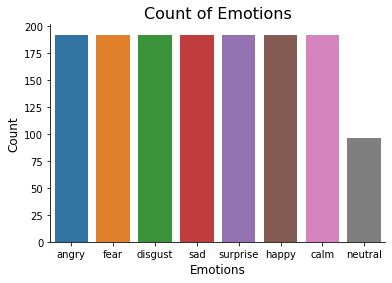

In [10]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


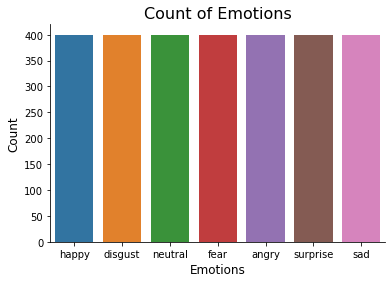

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(Tess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

/Users/preethi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


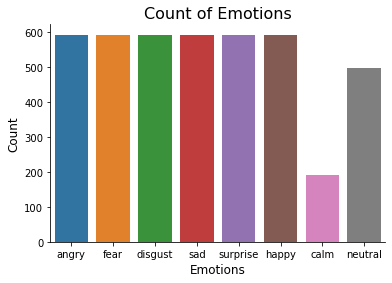

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [14]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [15]:
emotion = 'Angry'
path = ravdess_path + 'Actor_01/03-01-05-01-01-01-01.wav'
path

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-01-01-01.wav'

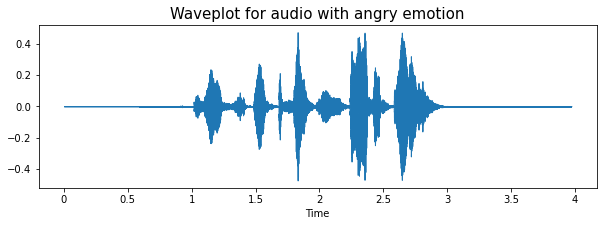

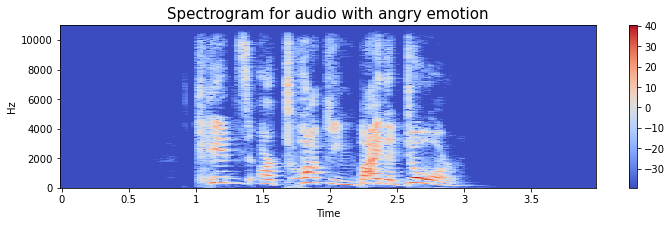

In [16]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

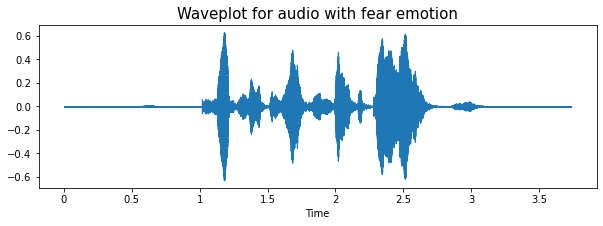

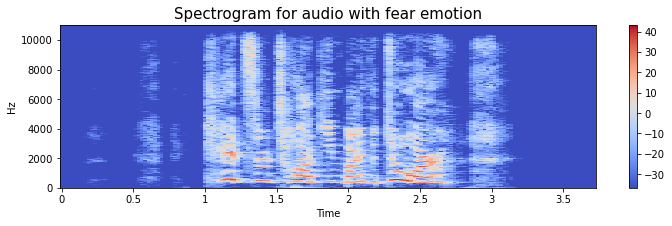

In [17]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

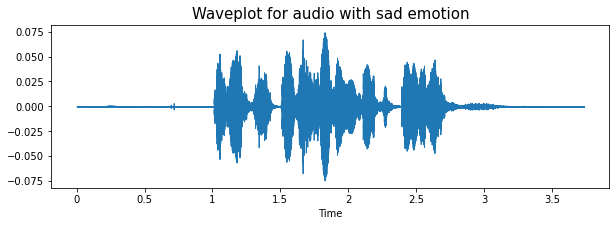

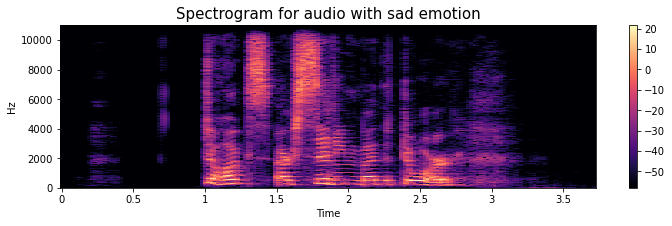

In [18]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

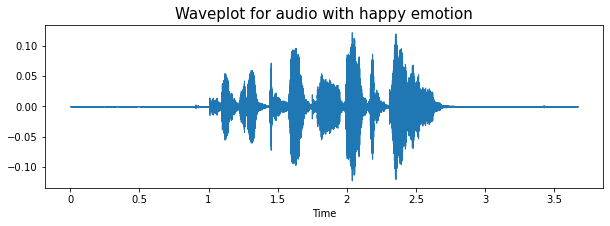

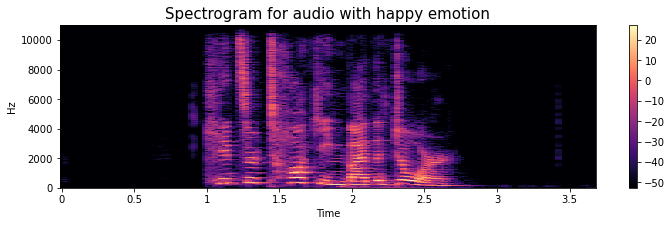

In [19]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size = data.shape[0])
    return data

In [21]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate)

In [22]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, shift_range)

In [23]:
def pitch(data, sampling_rate, pitch_factor = 0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [24]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [25]:
path

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav'

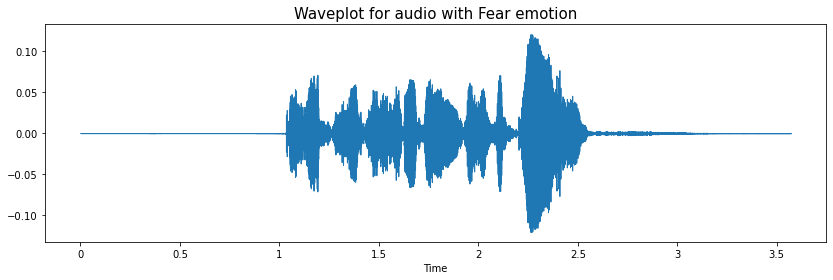

In [26]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = data, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion', size = 15)
Audio(path)

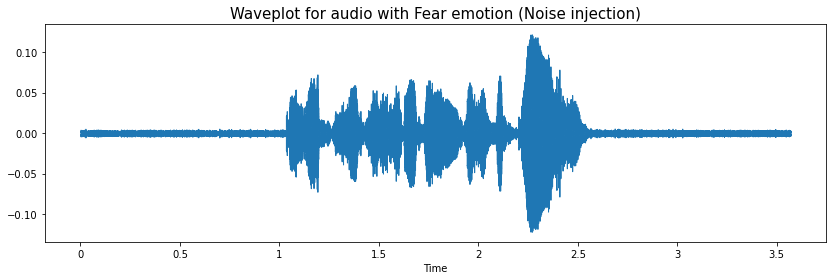

In [27]:
x = noise(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Noise injection)', size = 15)
Audio(x, rate = sample_rate)

/var/folders/s9/3mys0gn13yjg4kzxjyxb2gcm0000gp/T/ipykernel_7694/3688289632.py:2: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


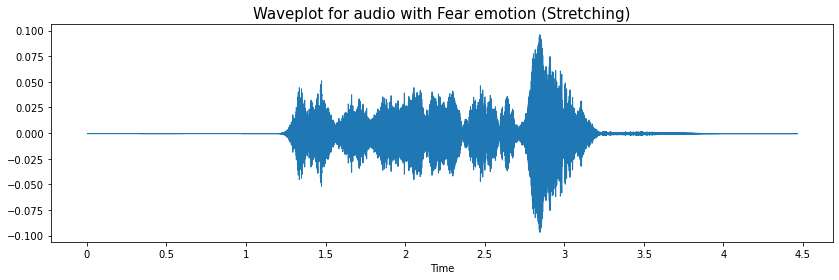

In [28]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot for audio with Fear emotion (Stretching)', size=15)
Audio(x, rate=sample_rate)

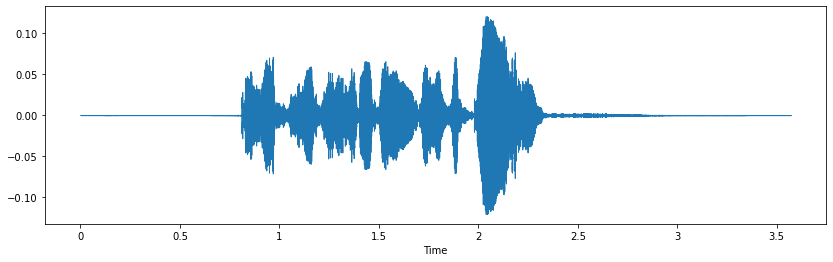

In [29]:
x = shift(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

/var/folders/s9/3mys0gn13yjg4kzxjyxb2gcm0000gp/T/ipykernel_7694/1499723393.py:2: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


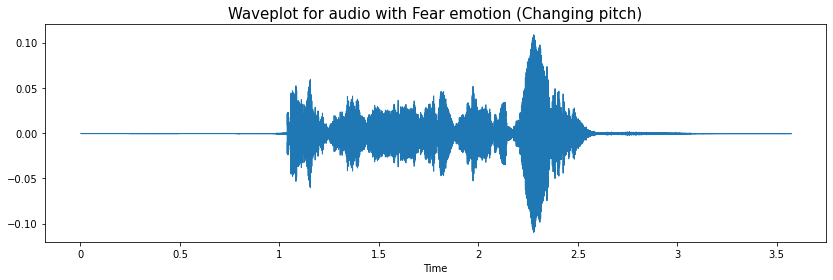

In [30]:
x = pitch(data, sample_rate)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Changing pitch)', size = 15)
Audio(x, rate = sample_rate)

In [31]:
data.shape

(78724,)